# `Finding Counties or States where Special care should be taken.`

> Focuing Mainly on how to differentiate between KMeans Clusttering and Agglomerative Hierarchical clustering on given data

### Dataset Information: 
These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov

### ATTRIBUTES:

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

studyPerCap: Per capita number of cancer-related clinical trials per county

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

Geography: County name

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [4]:
import pandas as pd

df=pd.read_csv("data_set.csv")
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [39]:
df_copy = df.copy(deep = True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (15,8)
pd.set_option('display.max_columns',None)

In [5]:
df.shape

(3047, 33)

In [15]:
df['Geography'].value_counts()

Graves County, Kentucky               1
Merrimack County, New Hampshire       1
Kittitas County, Washington           1
Brown County, Wisconsin               1
Craven County, North Carolina         1
Polk County, Tennessee                1
Walker County, Alabama                1
Marinette County, Wisconsin           1
Bronx County, New York                1
Rock Island County, Illinois          1
Rush County, Indiana                  1
White County, Tennessee               1
Greeley County, Kansas                1
New Haven County, Connecticut         1
Chesterfield County, Virginia         1
Lee County, Mississippi               1
Spartanburg County, South Carolina    1
Moore County, Tennessee               1
Sargent County, North Dakota          1
Hillsborough County, New Hampshire    1
Marquette County, Wisconsin           1
Baker County, Oregon                  1
Cochise County, Arizona               1
Union County, Kentucky                1
Renville County, North Dakota         1


- The Geography column is the name of the county and each row represents  each unique county.
- This column can be treated as Index, But in this let's do state wise only.
- We can create a new column as `state`.


In [ ]:
# Extracting state from Geography column

df['state'] = df['Geography'].apply(lambda x : x.split(',')[1])
df.drop(columns='Geography',inplace = True)

In [41]:
df['state'].value_counts()

 Texas                   233
 Georgia                 155
 Virginia                125
 Kentucky                120
 Missouri                115
 Kansas                  102
 Illinois                102
 North Carolina           99
 Iowa                     99
 Tennessee                95
 Indiana                  92
 Ohio                     87
 Minnesota                87
 Michigan                 83
 Mississippi              82
 Nebraska                 80
 Oklahoma                 77
 Arkansas                 75
 Wisconsin                72
 Pennsylvania             67
 Florida                  66
 Louisiana                64
 Alabama                  63
 New York                 62
 Colorado                 60
 South Dakota             59
 California               57
 West Virginia            55
 North Dakota             51
 Montana                  48
 South Carolina           46
 Idaho                    42
 Washington               39
 Oregon                   36
 New Mexico   

In [ ]:
# Assigning Each State a numerical variable using LabelEncoder 
# Imputing the Null values using KNNImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

se = LabelEncoder()
df['state'] = se.fit_transform(df['state'])

imp  = KNNImputer()
df_imputed = pd.DataFrame(imp.fit_transform(df), columns = df.columns)

In [85]:
df_imp = df_imputed.copy(deep = True)  

In [ ]:
# Visualizing distribution of each attribute
for col in df_imp.columns:
    print(col)
    print()
    sns.distplot(df_imp[col])
    plt.show()
    print()
    print('--'*60)

In [86]:
# Transforming the Skewed data.
right_skewed = ['avgAnnCount','avgDeathsPerYear','MedianAge','popEst2015' ]
left_skewed = ['PctWhite']

for col in right_skewed:
    df_imp[col] = np.log(df[col])
    
df_imp['PctWhite'] = np.square(df_imp['PctWhite'])

avgAnnCount



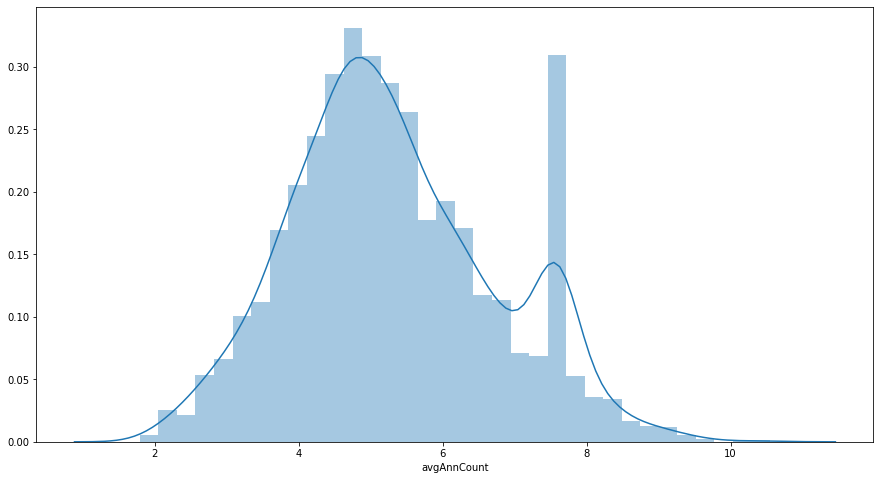


------------------------------------------------------------------------------------------------------------------------
avgDeathsPerYear



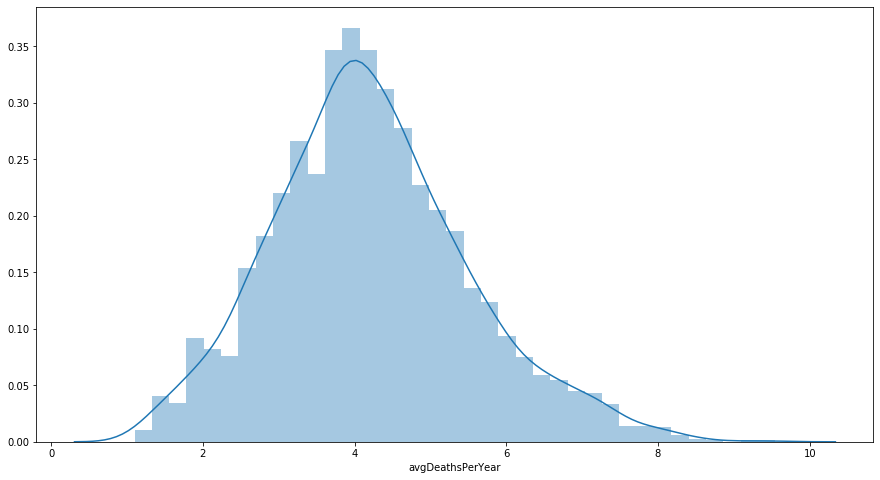


------------------------------------------------------------------------------------------------------------------------
MedianAge



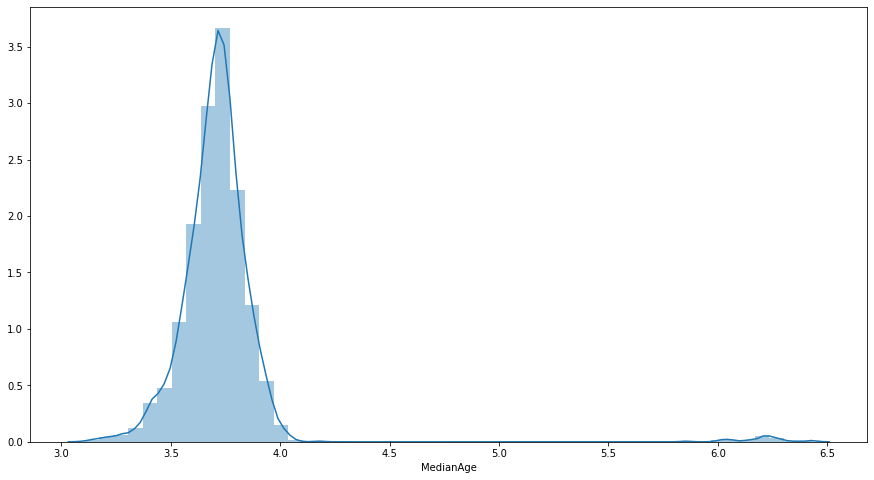


------------------------------------------------------------------------------------------------------------------------
popEst2015



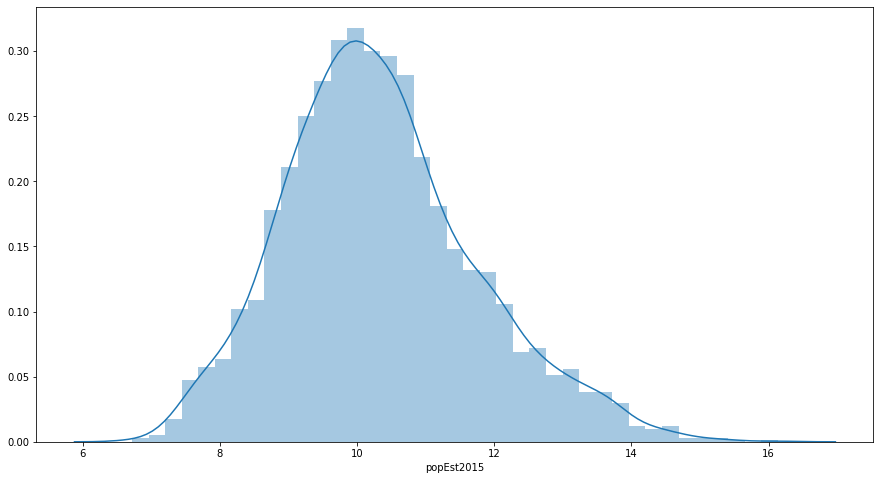


------------------------------------------------------------------------------------------------------------------------


In [88]:
# Visualizing after transformation
for col in right_skewed:
    print(col)
    print()
    sns.distplot(df_imp[col])
    plt.show()
    print()
    print('--'*60)

In [90]:
# Standardizing the data
from scipy.stats import zscore

data_std = df_imp.apply(zscore)

In [91]:
data_std.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,state
0,1.342284,1.478094,-0.496057,0.761321,1.232312,1.514897,-0.886102,0.650277,-0.194464,-0.511128,-0.084151,0.140614,0.105328,-0.831027,0.496010,0.163489,0.163794,-1.649849,1.171327,-0.275845,0.042757,1.009370,0.957455,0.042734,-0.427608,-0.857336,-0.248767,-0.448196,1.367088,-0.039818,0.245324,0.241011,1.46394
1,-0.118077,0.026398,-0.625801,-0.672179,0.088363,0.242098,0.268698,-0.249816,-0.821447,-1.410622,-1.595872,-0.325473,-1.054799,-1.498374,-1.389694,2.987358,0.296294,-1.251770,1.746053,0.210133,-0.015184,0.549074,0.550997,0.254461,-0.657187,-0.644641,0.300651,-0.560060,0.380201,0.499790,-0.893428,-0.658382,1.46394
2,-0.487447,-0.230399,-0.142865,-1.806881,0.189790,-0.269986,-0.355519,-0.203646,0.291564,0.847682,0.690607,0.327049,0.351855,0.713759,0.176212,-0.512176,0.737959,-0.825256,0.503902,-1.004811,-0.246947,-0.061524,-0.506205,-0.666550,0.745793,0.304306,0.432268,-0.575848,-0.301959,0.217176,0.487085,-0.962391,1.46394
3,0.513592,0.835221,0.581539,-0.327553,-0.234279,0.640697,0.034617,0.353585,0.111689,0.503195,0.237090,0.094006,0.134331,0.244144,0.683477,-0.610174,-0.807869,-0.455611,-0.738248,-0.713225,1.230541,-0.559396,-0.834656,-0.655964,1.153933,0.942391,0.497078,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020,1.46394
4,-0.894292,-0.729478,-1.234876,-1.799549,0.240214,-0.774905,-0.683232,-0.293460,0.545523,1.574933,1.276399,-0.325473,0.873912,-0.410845,0.881972,-0.107293,-0.918285,-0.199702,0.318507,-0.725374,-0.884295,-0.258794,-0.465148,-0.645377,0.988126,0.566084,0.686223,-0.608154,-0.225352,-0.424035,0.423570,0.582401,1.46394


### 	Dimensionality Reduction


In [105]:
def check_multicolinearity(data_x):
    corr = data_x.corr()
    corr = pd.DataFrame(np.tril(corr, k =-1),
                       columns = data_x.columns,
                       index = data_x.columns)
    
    corr = corr.replace(0.000000,np.NAN)
    count_of_total_correlation_values = corr.count().sum()
    
    
    for i in [0.5,0.6,0.7,0.8,0.9]:
        data_corr = corr[abs(corr) > i]
        count_greater_than_thresh = data_corr.count().sum()
        print(f'Percent Values Greater than {i} co-relation : {count_greater_than_thresh*100/count_of_total_correlation_values}')
        
        
    return  corr

In [106]:
def plot_corr(threshold, corr):
    data_corr = corr[abs(corr) > threshold]
    sns.heatmap(data_corr, annot = True)
    plt.show()

In [107]:
corr = check_multicolinearity(data_std)

Percent Values Greater than 0.5 co-relation : 10.984848484848484
Percent Values Greater than 0.6 co-relation : 9.280303030303031
Percent Values Greater than 0.7 co-relation : 5.871212121212121
Percent Values Greater than 0.8 co-relation : 2.462121212121212
Percent Values Greater than 0.9 co-relation : 0.3787878787878788


- only 10% of features are correlated.
- Reducing the dimensions using PCA may not give much effect for the data 

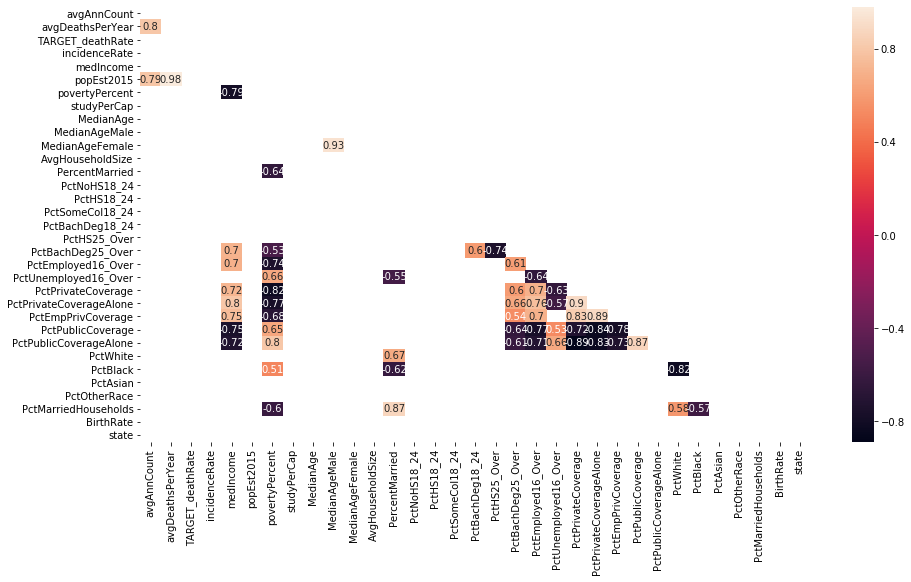

In [112]:
plot_corr(0.5, corr)

In [113]:
from sklearn.decomposition import PCA

In [120]:
actual_length = len(data_std.columns)

pca = PCA(n_components=actual_length, random_state = 0)
data_pca = pca.fit_transform(data_std)

In [125]:
pca.explained_variance_ratio_.cumsum()

array([0.29314432, 0.4602961 , 0.53578575, 0.58917288, 0.63690011,
       0.67229356, 0.70477303, 0.73522138, 0.76244673, 0.78711807,
       0.81114934, 0.83396587, 0.85515296, 0.87413163, 0.89172504,
       0.90876776, 0.92230294, 0.9349999 , 0.94627491, 0.95687995,
       0.96523494, 0.9721775 , 0.9781447 , 0.98300734, 0.98690011,
       0.99006414, 0.99242145, 0.99463326, 0.99648686, 0.9981467 ,
       0.99945809, 0.99993468, 1.        ])

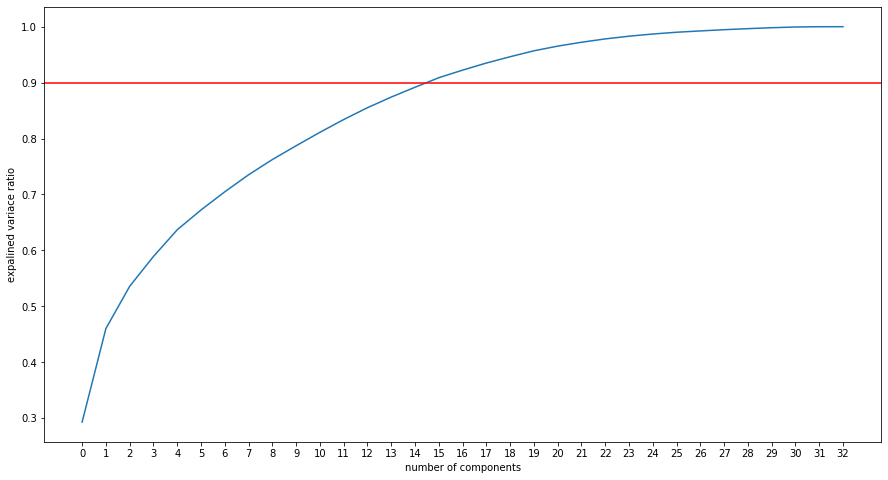

In [133]:
sns.lineplot(y =pca.explained_variance_ratio_.cumsum(),
            x = range(actual_length))


plt.xticks(range(actual_length))
plt.axhline(0.9,color = 'red')
plt.xlabel('number of components')
plt.ylabel('expalined variace ratio')
plt.show()

- 15 pca components are able to explain 90% of variance in the data

In [136]:
pca1 = PCA(n_components=16, random_state = 0)
data_pca1 = pca1.fit_transform(data_std)

df_pca = pd.DataFrame(data_pca1)

In [138]:
corr = check_multicolinearity(df_pca)

Percent Values Greater than 0.5 co-relation : 0.0
Percent Values Greater than 0.6 co-relation : 0.0
Percent Values Greater than 0.7 co-relation : 0.0
Percent Values Greater than 0.8 co-relation : 0.0
Percent Values Greater than 0.9 co-relation : 0.0


- Co-relation is very very less after PCA

In [151]:
weightage_of_column_pca_component =pd.DataFrame(pca1.components_,columns= data_std.columns)

In [152]:
weightage_of_column_pca_component.style.bar(color = '#00c41f')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,state
0,0.136931,0.0982238,-0.164933,0.00171171,0.279043,0.124085,-0.269534,0.0336955,-0.0280822,-0.0440158,-0.0649204,0.00613507,0.131905,-0.151261,-0.113159,0.13856,0.19044,-0.156535,0.250552,0.270008,-0.203941,0.283677,0.296512,0.273126,-0.277174,-0.278414,0.102289,-0.126762,0.122408,0.007878,0.141971,-0.00846468,0.0301981
1,0.228679,0.284612,0.0469562,0.0656204,0.0111298,0.305359,0.160341,0.0359085,-0.154287,-0.293732,-0.278234,0.113212,-0.32347,-0.0700748,-0.134802,0.143859,0.0749294,-0.198482,0.102419,-0.0270462,0.195949,-0.09534,-0.0104011,0.0241592,-0.0416163,0.0978823,-0.30402,0.233173,0.197702,0.118549,-0.262703,-0.0510723,-0.061808
2,-0.258413,-0.280858,-0.223608,-0.35462,0.0328702,-0.191381,0.0484461,-0.0677358,-0.217758,-0.291944,-0.305215,0.275995,0.0334528,0.211692,-0.0411227,-0.104462,-0.110683,-0.134491,-0.00747753,0.0854729,-0.078601,-0.111115,-0.0184252,-0.0699819,-0.176967,-0.042619,-0.110787,-0.0301495,0.000143488,0.29022,0.125735,0.253794,0.0346551
3,-0.0258284,-0.00624079,0.38013,0.346203,-0.0394196,-0.00835576,0.00631437,0.0203104,-0.236625,-0.308208,-0.310217,0.122837,0.00520275,-0.105056,0.202407,0.0188987,-0.207697,0.330234,-0.252638,0.068943,-0.0122674,0.0702416,0.12714,0.218284,-0.155935,-0.047093,0.0986405,-0.0179397,-0.194472,-0.186949,0.0983005,0.0848668,0.0477274
4,-0.279706,-0.329527,0.0148659,0.0711684,-0.0851387,-0.318344,0.0901291,0.0289769,-0.0487222,-0.038749,-0.01289,-0.31034,-0.229317,-0.0915738,-0.271632,-0.0178541,0.186807,-0.0201494,0.108954,0.0735248,-0.111107,0.142012,0.096121,0.0497645,-0.11079,-0.153057,-0.162719,0.320216,-0.121118,-0.283621,-0.310033,-0.0421689,-0.0193808
5,-0.0619809,-0.0118845,0.104182,0.0713862,0.264264,-0.00684288,-0.114178,-0.237802,0.241718,0.0910303,0.105022,0.143412,-0.016686,0.159148,0.404634,-0.381949,-0.00629921,0.061774,0.0146556,-0.00441562,0.0586496,0.0592527,0.0943329,0.106908,-0.135026,-0.120939,-0.383247,0.371664,0.202409,0.0328151,0.0470493,-0.0999142,0.059886
6,0.107241,-0.0433043,0.0161263,0.175,0.0736635,-0.042027,-0.0491666,0.00376929,0.0278879,0.00851241,0.0109619,-0.00530272,0.122914,0.27071,-0.195445,-0.0196974,-0.0634414,0.0100876,-0.0393831,0.0405766,0.0647055,0.0249263,0.0287386,0.00145763,0.00604238,0.00906617,-0.0379346,0.0664993,0.0717479,-0.0897469,0.114348,0.215733,-0.852279
7,0.0424279,-0.0185755,0.0120725,0.0921386,0.0288629,-0.029159,-0.0352999,0.851904,0.0803244,0.0381914,0.0529685,-0.00671904,-0.0089925,0.0215523,0.170793,-0.165812,-0.017305,-0.0503104,0.0429075,0.0660807,-0.0288927,0.0058465,-0.0102889,-0.0239271,0.0206472,0.0027349,-0.0847134,0.0465944,0.0827632,0.0469844,-0.0784832,0.38223,0.104383
8,-0.133242,-0.0868307,0.0482028,-0.00596128,0.020409,-0.072144,0.0315782,0.364373,-0.213744,-0.0127238,-0.0398445,0.202407,-0.0214797,0.0331509,-0.0262481,-0.257016,0.0984826,-0.00569923,0.0234722,-0.0673768,0.00386391,-0.0264224,-0.000352496,0.0524503,-0.0165803,0.0188779,0.100251,-0.133605,0.10178,0.0566047,0.0797175,-0.754245,-0.201567
9,0.093048,0.0152765,0.181495,0.294784,-0.00991831,-0.0148144,-0.020778,-0.162348,-0.266322,-0.0233834,-0.0227235,-0.471692,0.0277893,0.194378,-0.0385413,-0.330622,0.201696,0.00304317,-0.0426285,0.12198,-0.224361,-0.0520802,-0.0407553,-0.0155621,0.0416833,0.0727861,0.0280317,-0.184158,0.157154,0.449634,-0.0991306,0.0599535,0.0772233


### K-Means

In [157]:
from sklearn.cluster import KMeans

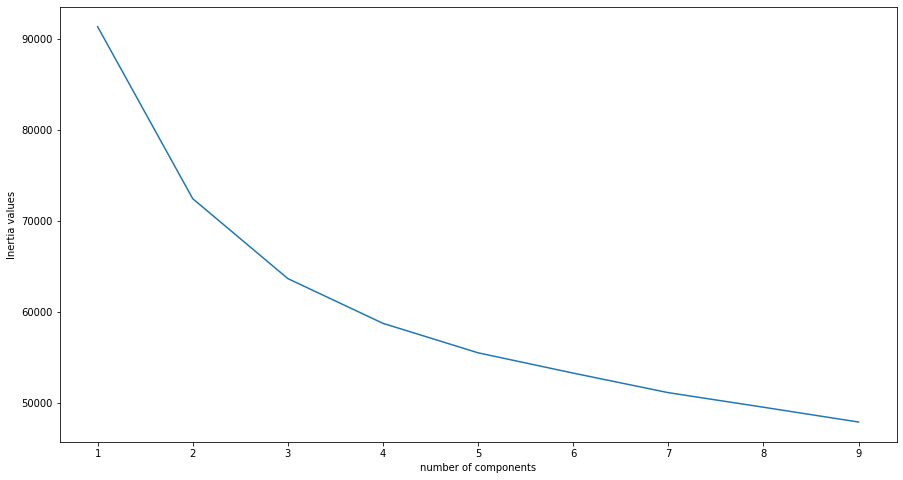

In [160]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

sns.lineplot(x= range(1,10), y=wcss)    
plt.xticks(range(1,10))
plt.xlabel('number of components')
plt.ylabel('Inertia values')
plt.show()

- We can observe smaller notches at clusters 3,4
- There is significant change at cluster 2

In [163]:
from sklearn.metrics import silhouette_score

for i in [2,3,4]:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
        
    score = silhouette_score(df_pca, kmeans.labels_)
    print(f'Silhoutte score at cluster{i} : {score}')
    

Silhoutte score at cluster2 : 0.1896461398810737
Silhoutte score at cluster3 : 0.16293718382726383
Silhoutte score at cluster4 : 0.1415355413799782


--- 
#### Lets check the centroids of clusters 2,3

In [165]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(df_pca)

centroid_df = pd.DataFrame(kmeans_2.cluster_centers_, columns = df_pca.columns)

In [166]:
centroid_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.636435,-0.007716,-0.023385,-0.078329,-0.107722,0.050645,-0.027726,-0.026873,0.033748,0.025109,0.035994,-0.002089,-0.046944,0.007143,-0.035355,0.025466
1,2.343861,0.006860,0.020790,0.069637,0.095768,-0.045025,0.024649,0.023891,-0.030003,-0.022323,-0.031999,0.001857,0.041734,-0.006351,0.031432,-0.022640


In [168]:
plt.style.use('ggplot')

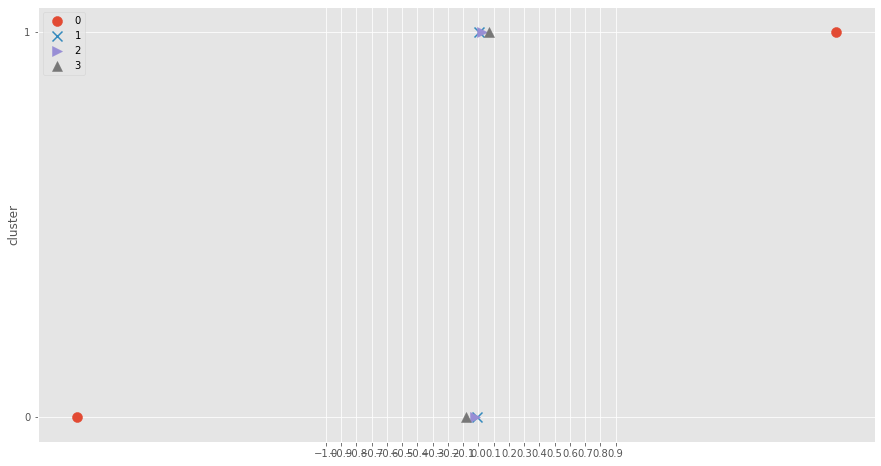

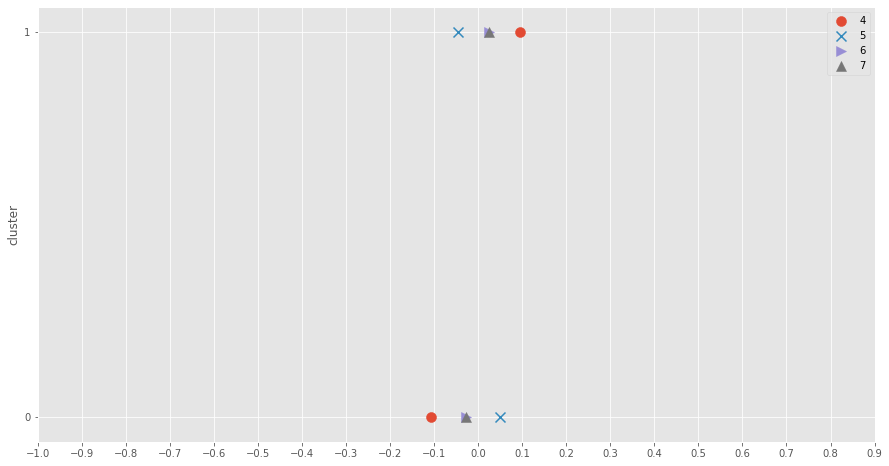

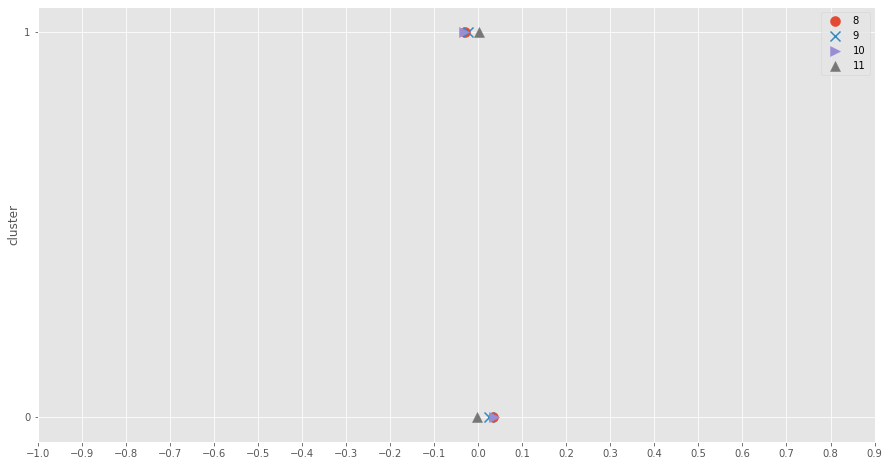

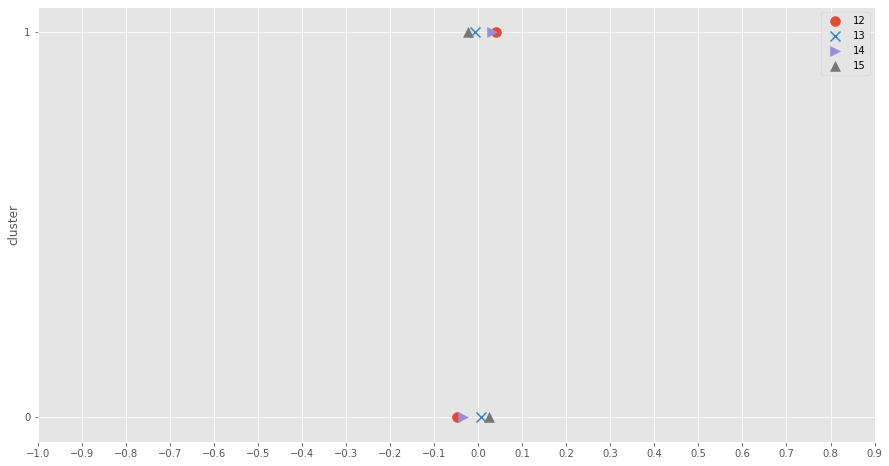

In [176]:
markers = ['o','x','>','^']*4

for index,col in enumerate(centroid_df.columns):  #chng
    plt.scatter(y = [0,1],    # chng
                x = centroid_df[col],
               label = col,marker = markers[index],s = 100)
    if (index+1)%4 == 0:
        plt.yticks([0,1])   # chng
        plt.xticks(np.arange(-1,1,step = 0.1))
        plt.ylabel('cluster')
        plt.legend()
        plt.show()

- while using 2 clusters  most of the cluster centroids are very close other than Pc_component_0

In [184]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(df_pca)

centroid_df_ = pd.DataFrame(kmeans_3.cluster_centers_, columns = df_pca.columns)

In [185]:
centroid_df_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.331876,0.574581,0.116386,-0.104048,-0.064572,0.084916,0.031872,-0.031307,0.030167,-0.028049,0.011502,0.029600,-0.066740,0.018407,-0.047493,0.006201
1,3.331134,2.313621,-0.125201,-0.106059,-0.060591,-0.060498,-0.066652,-0.040675,0.040601,-0.059839,0.085665,-0.010255,-0.073101,-0.000310,-0.110455,0.019335
2,0.794048,-1.644789,-0.023121,0.134480,0.080729,-0.032975,0.010567,0.045039,-0.044133,0.052568,-0.053471,-0.017151,0.088908,-0.013833,0.093777,-0.014809


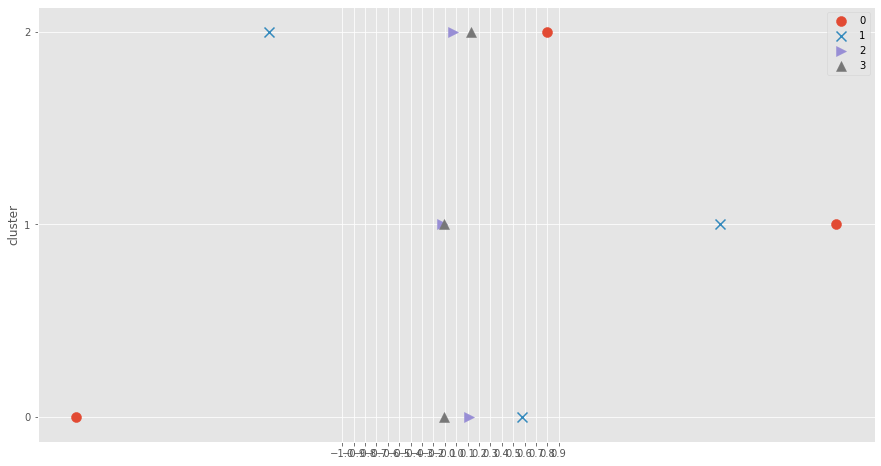

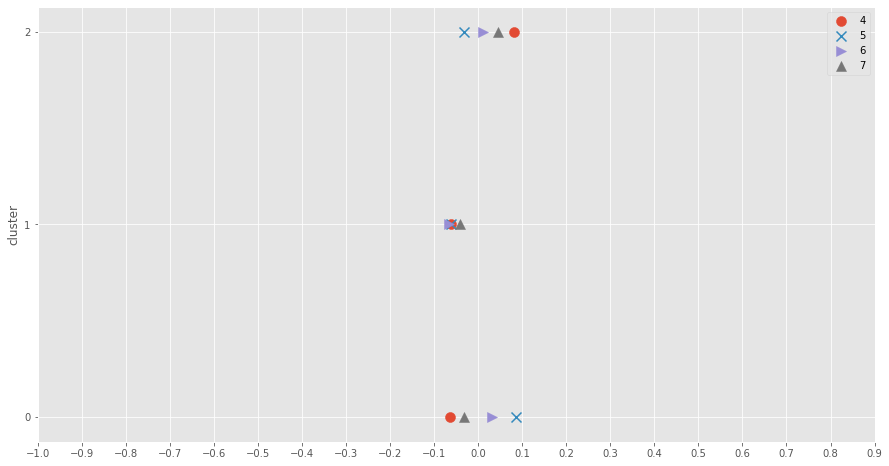

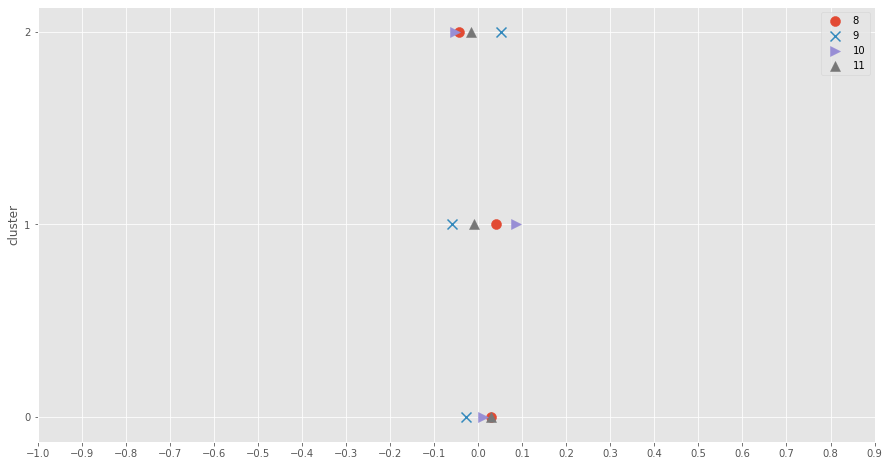

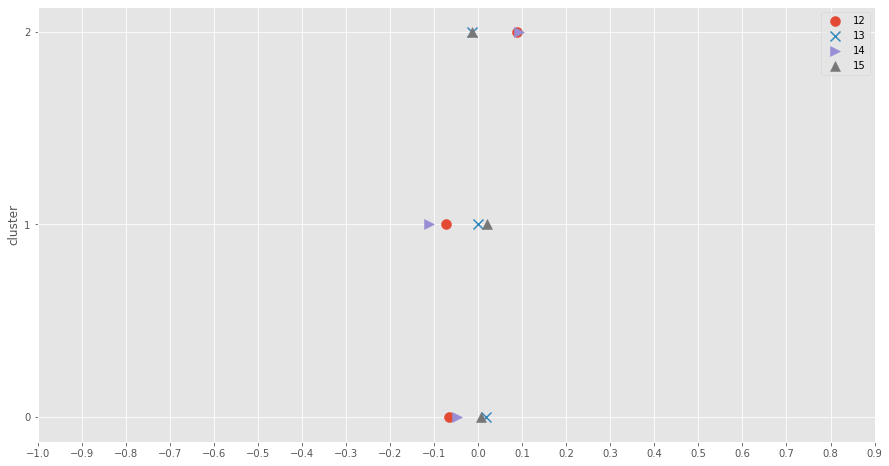

In [186]:
markers = ['o','x','>','^']*4

for index,col in enumerate(centroid_df_.columns):
    plt.scatter(y = [0,1,2],
                x = centroid_df_[col],
               label = col,marker = markers[index],s = 100)
    if (index+1)%4 == 0:
        plt.yticks([0,1,2])
        plt.xticks(np.arange(-1,1,step = 0.1))
        plt.ylabel('cluster')
        plt.legend()
        plt.show()

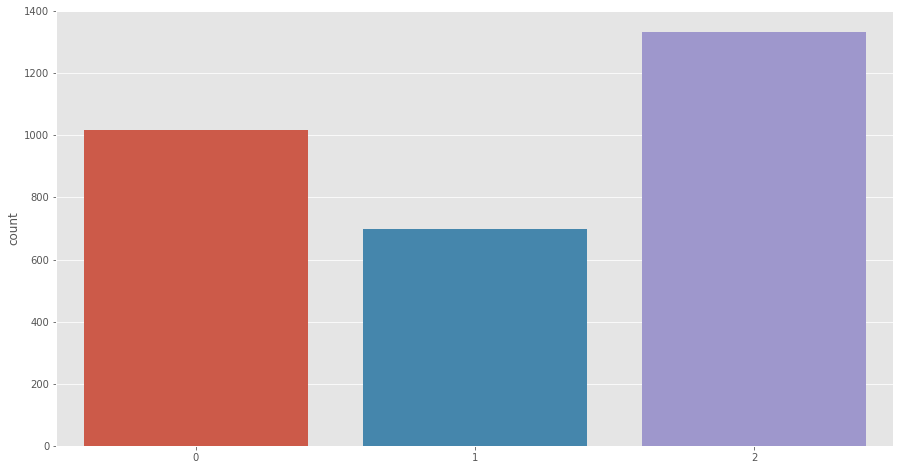

In [263]:
sns.countplot(kmeans_3.labels_)
plt.show()

In [188]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df_pca)

centroid_df_4 = pd.DataFrame(kmeans_4.cluster_centers_, columns = df_pca.columns)

In [189]:
centroid_df_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-4.233714,2.037385,0.755581,-0.110763,0.593136,0.414737,0.233977,0.045208,-0.091692,-0.124935,-0.179599,0.007687,-0.024807,0.061835,0.123925,-0.110790
1,1.836387,-1.794150,0.424670,0.175774,0.303301,0.000097,0.150663,0.112506,-0.099014,0.011328,-0.108792,-0.005939,0.104568,0.021562,0.124394,-0.058386
2,-1.668134,-0.864643,-0.568531,0.006915,-0.468904,-0.135440,-0.180380,-0.099083,0.100182,0.062468,0.107274,0.008241,-0.040788,-0.032565,-0.106676,0.073422
3,3.318200,2.592928,-0.219926,-0.187659,-0.089747,-0.079428,-0.088922,-0.030226,0.043307,-0.029820,0.111446,-0.011096,-0.065693,-0.022430,-0.093730,0.043517


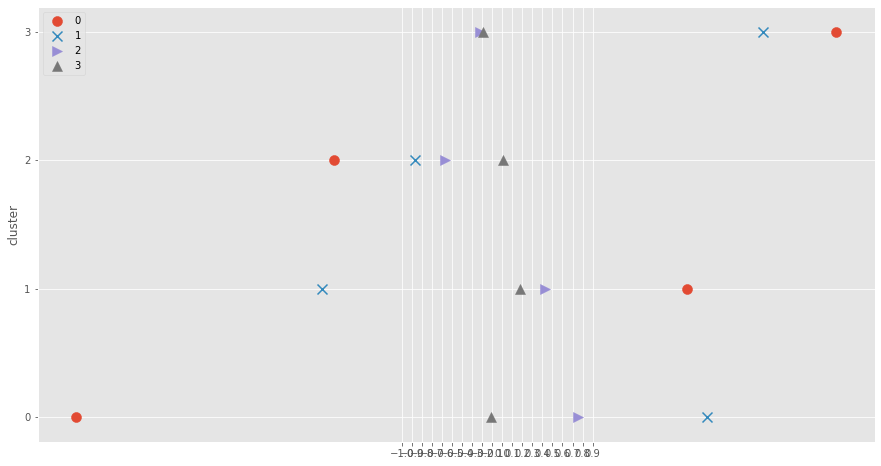

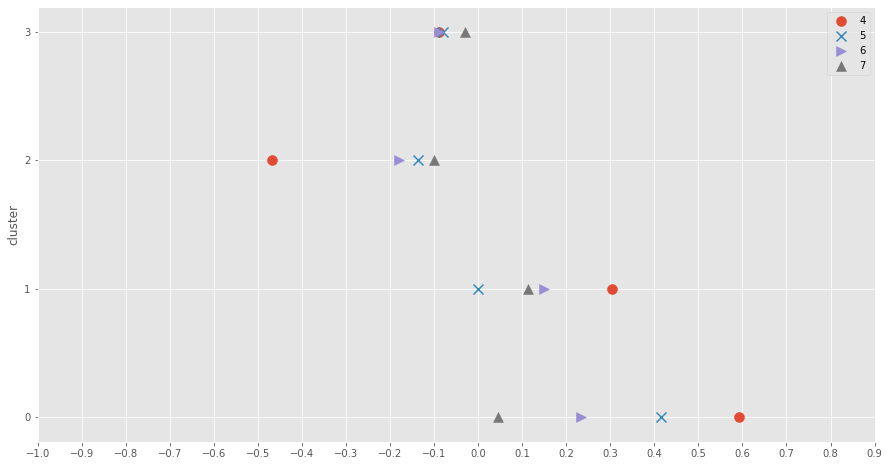

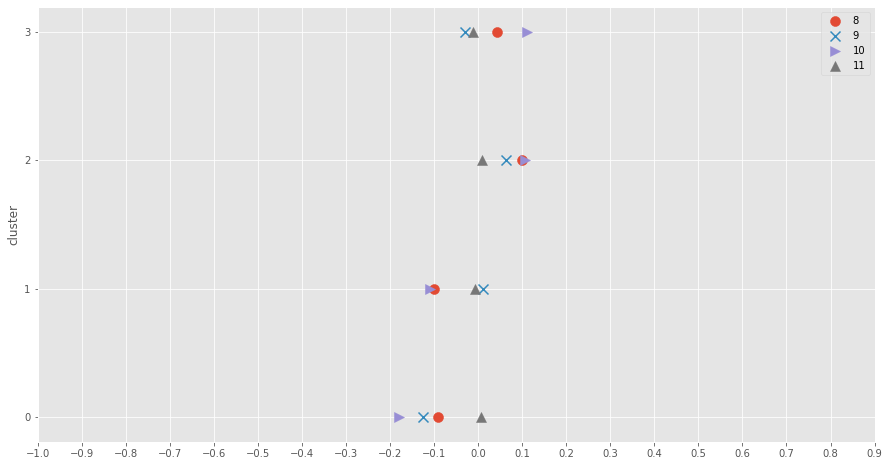

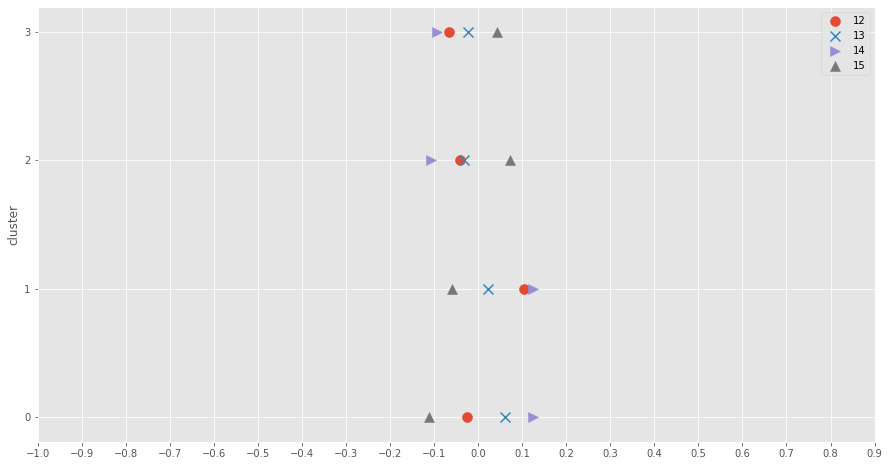

In [190]:
markers = ['o','x','>','^']*4

for index,col in enumerate(centroid_df_4.columns):
    plt.scatter(y = [0,1,2,3],
                x = centroid_df_4[col],
               label = col,marker = markers[index],s = 100)
    if (index+1)%4 == 0:
        plt.yticks([0,1,2,3])
        plt.xticks(np.arange(-1,1,step = 0.1))
        plt.ylabel('cluster')
        plt.legend()
        plt.show()

- By comapring centroids of 2,3,4 clusters.**I Prefer no of clusters = 4**, because the cluster centroids are differnt when compared to clusters 2,3 

In [191]:
score = silhouette_score(df_pca, kmeans_4.labels_)
print(f'Silhoutte score at cluster{i} : {score}')

Silhoutte score at cluster4 : 0.14165758080131513


In [192]:
df_copy['predicted_labels'] = kmeans_4.labels_

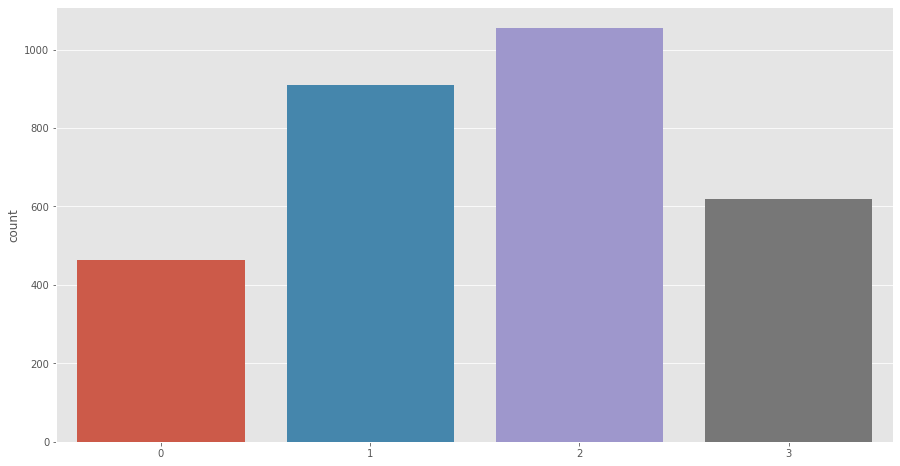

In [262]:
sns.countplot(kmeans_4.labels_)
plt.show()

### Agglomerative Clustering

In [212]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [215]:
def find_best_linkage(data_,plot = False):
    linkage_methods = ['complete','single','average','ward','centroid']
    cophenet_index = []
    
    for linkage_method in linkage_methods:
        z = linkage(data_, method = linkage_method)
        cop_index, coph_dists = cophenet(z, pdist(data_))
        cophenet_index.append(cop_index)
        
    if plot:
        sns.scatterplot(y = linkage_methods, x = cophenet_index)
        plt.xticks(np.arange(0,1,step = 0.1))

        plt.show()
        
    print(f'Best Linkage Method for the given data is : {linkage_methods[np.argmax(cophenet_index)]}')

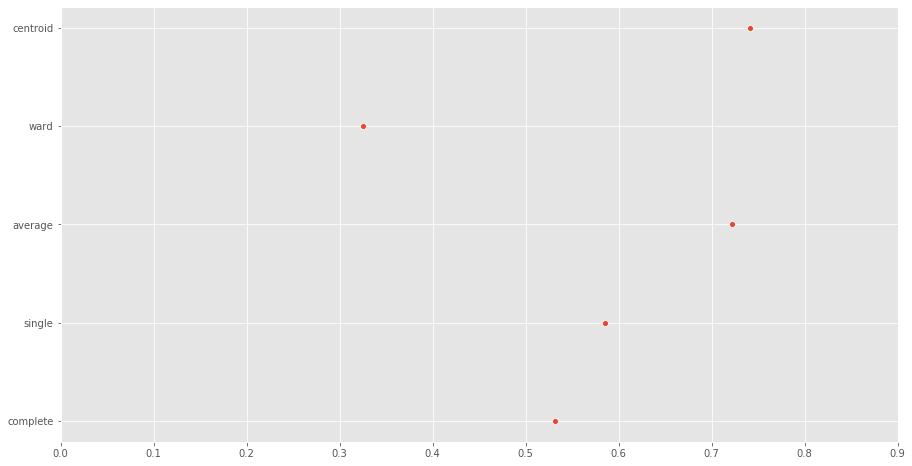

Best Linkage Method for the given data is : centroid


In [216]:
find_best_linkage(df_pca,True)

- Centroid Linkage method has highest cophent_index, we can also average method also 

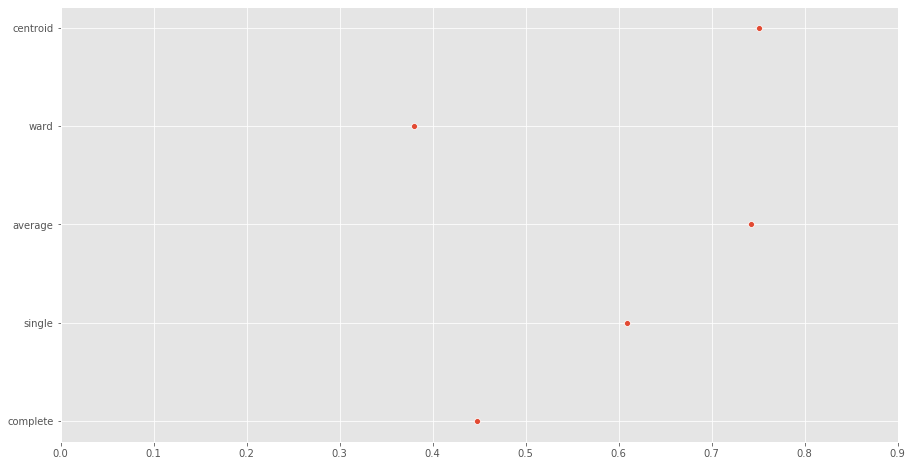

Best Linkage Method for the given data is : centroid


In [218]:
find_best_linkage(data_std,True)  # for actual data 

In [229]:
def plot_dendogram(data,distance_threshold ,linkage_method = 'centroid', p=5):  #chng
    plt.figure(figsize = (30,20))
    plt.title('Agglomerative Hirearchiacal Clustering Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    
    z = linkage(data,linkage_method)
    dendrogram(z, leaf_rotation = 90, color_threshold = distance_threshold,
             leaf_font_size = 10, truncate_mode = 'level',p=p)
    
    plt.tight_layout()

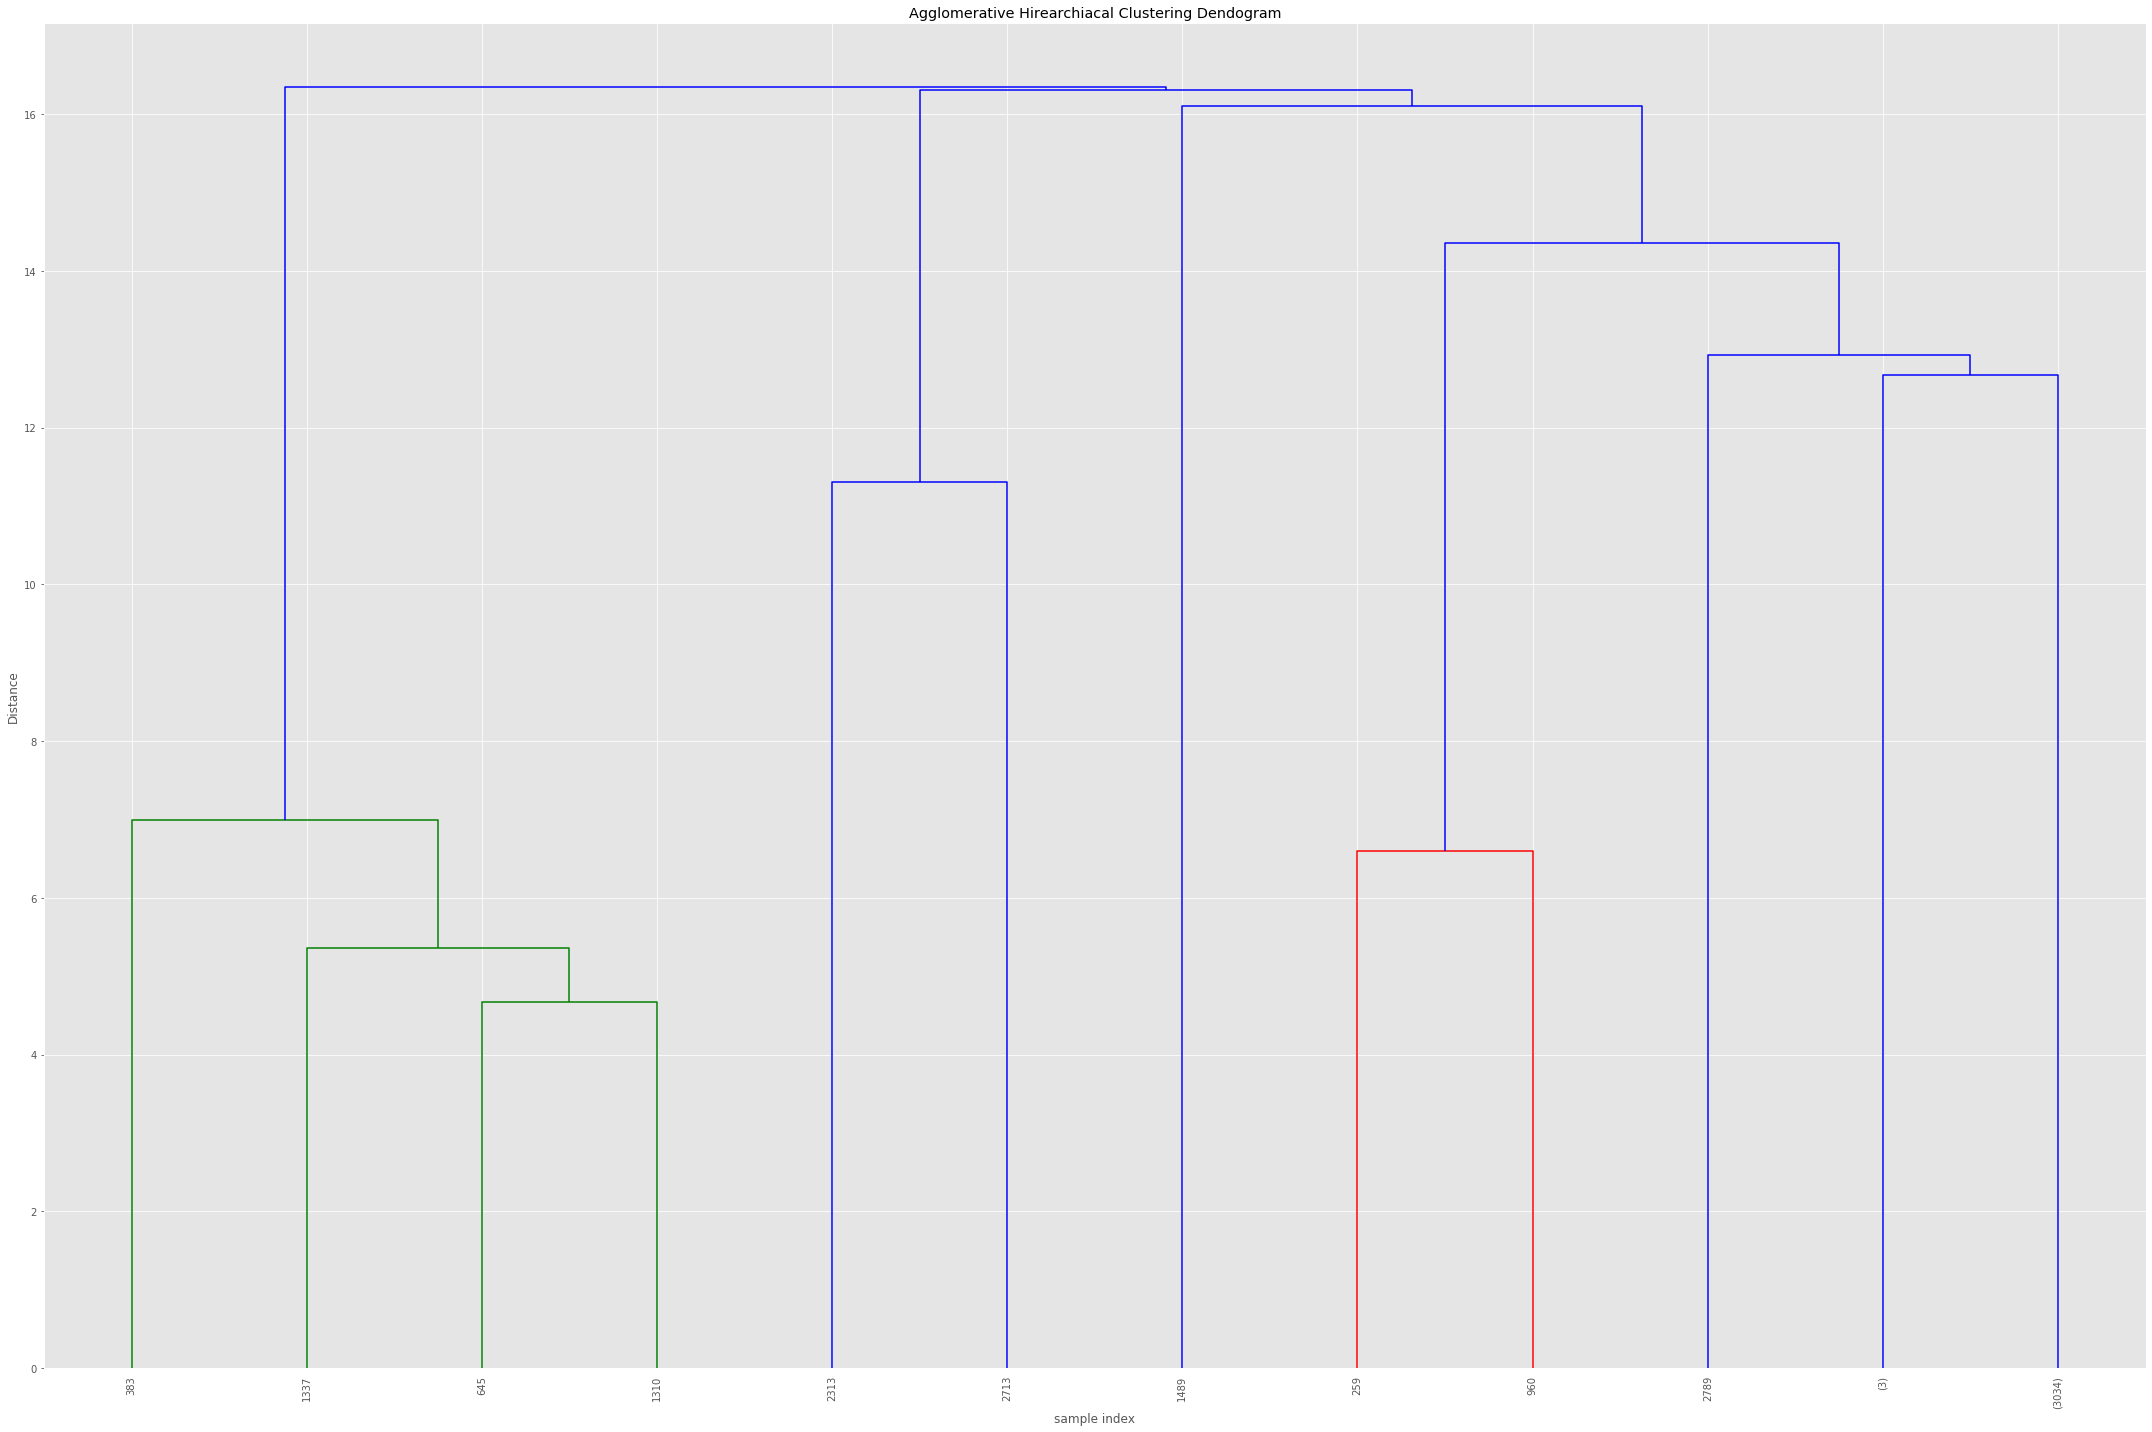

In [231]:
plot_dendogram(data_pca,distance_threshold=10)

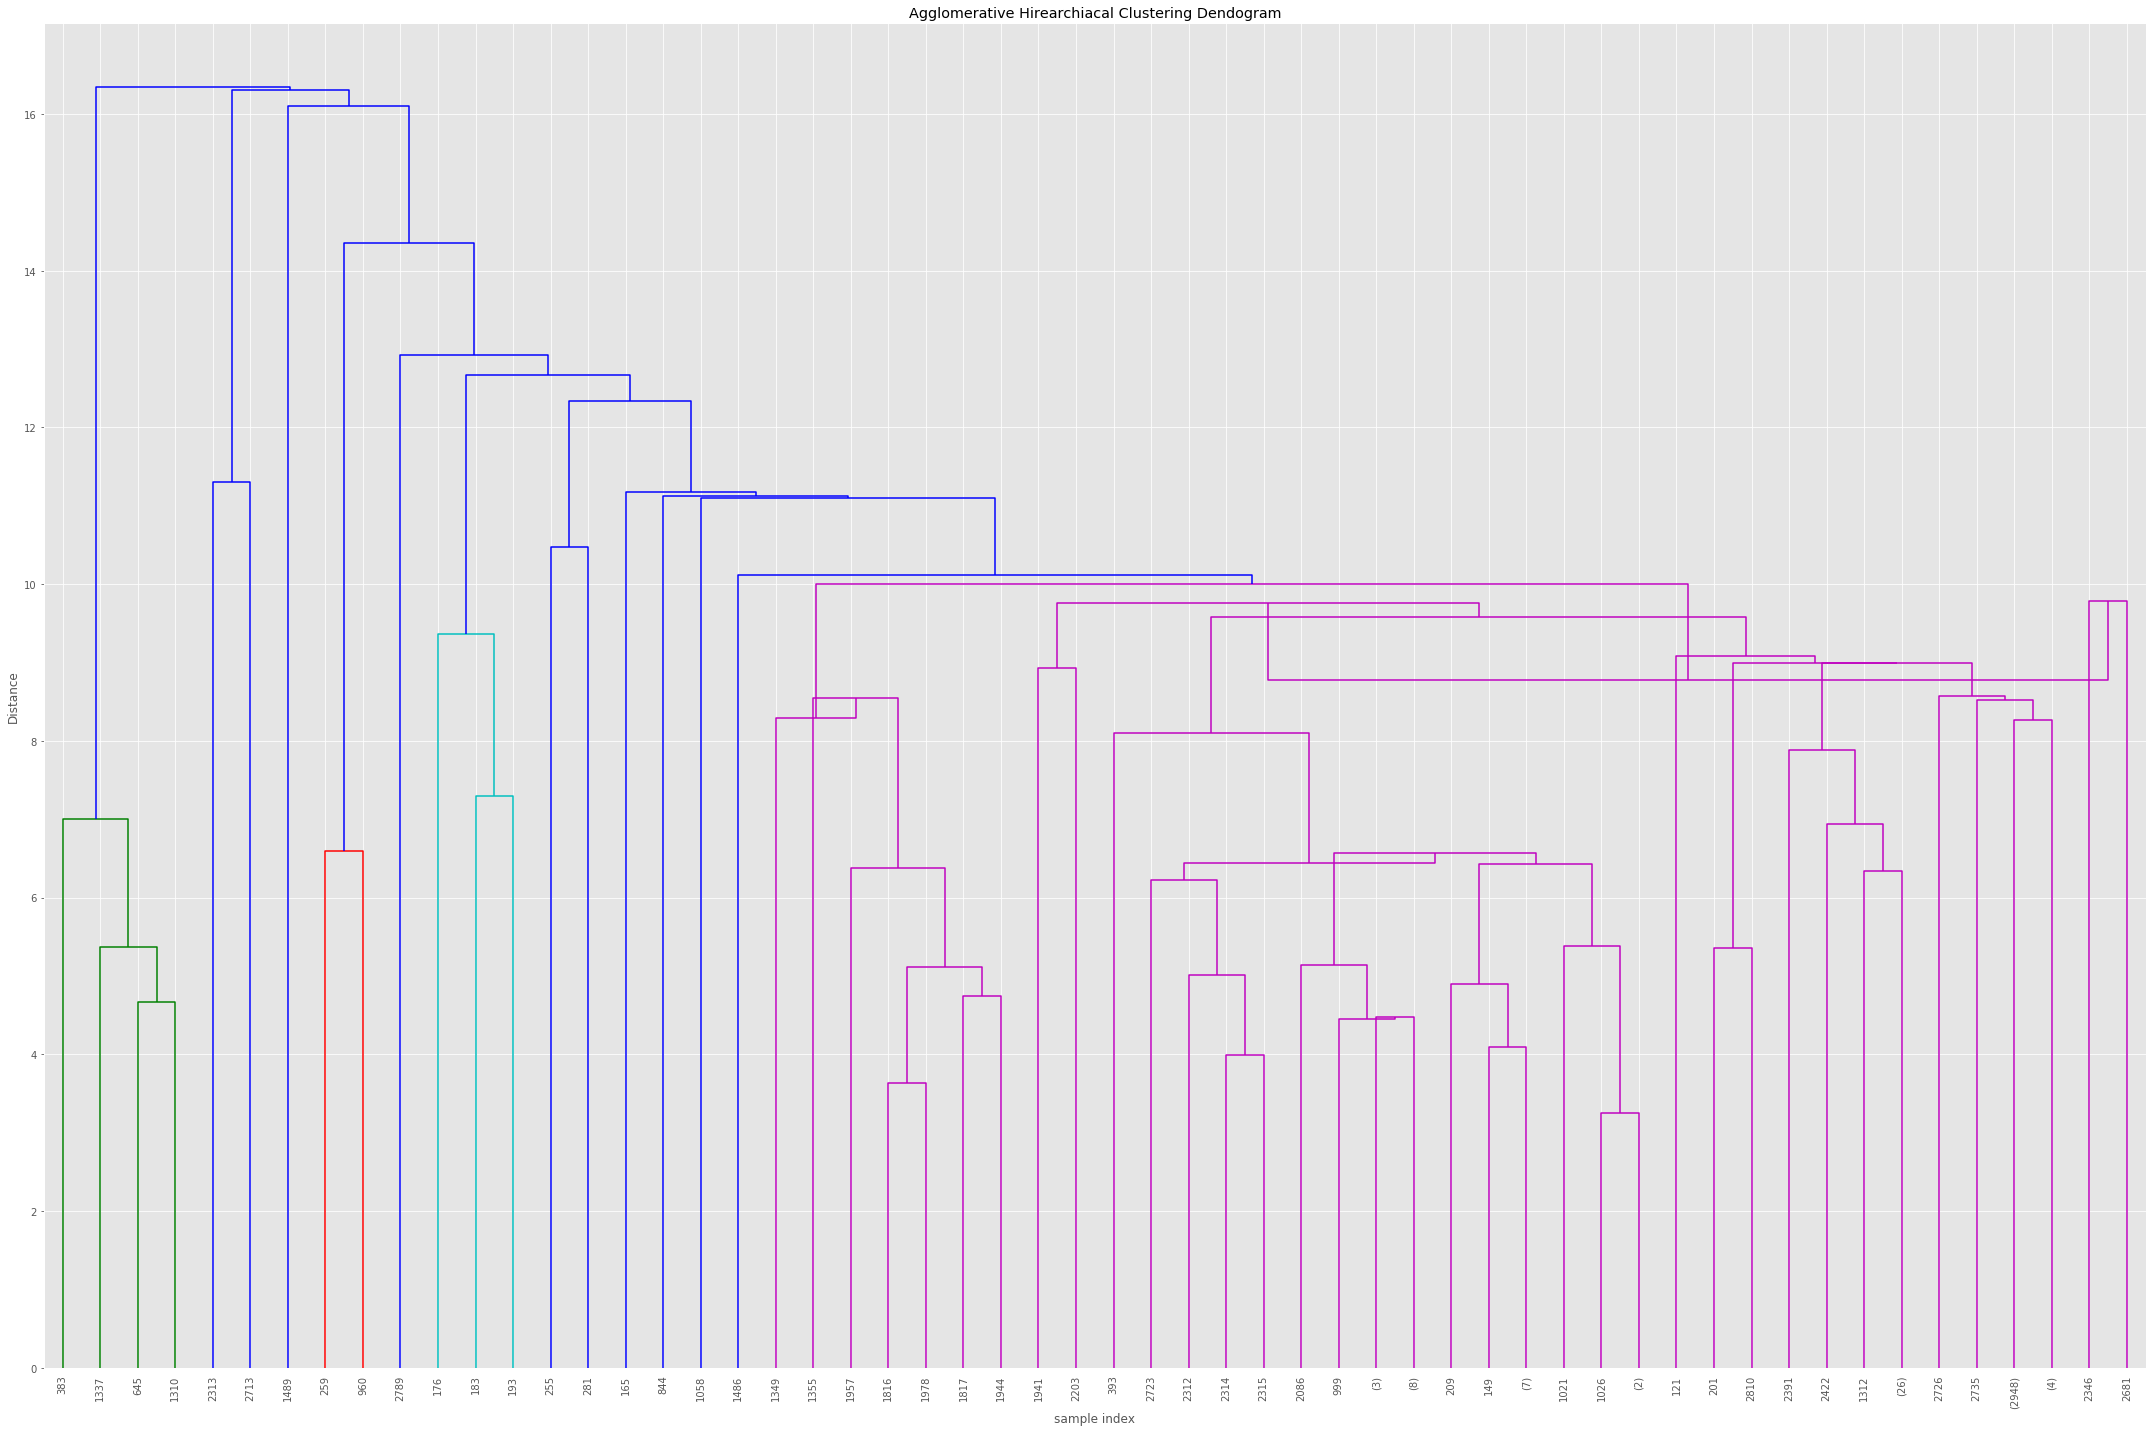

In [232]:
plot_dendogram(data_pca,distance_threshold=10,p=20)

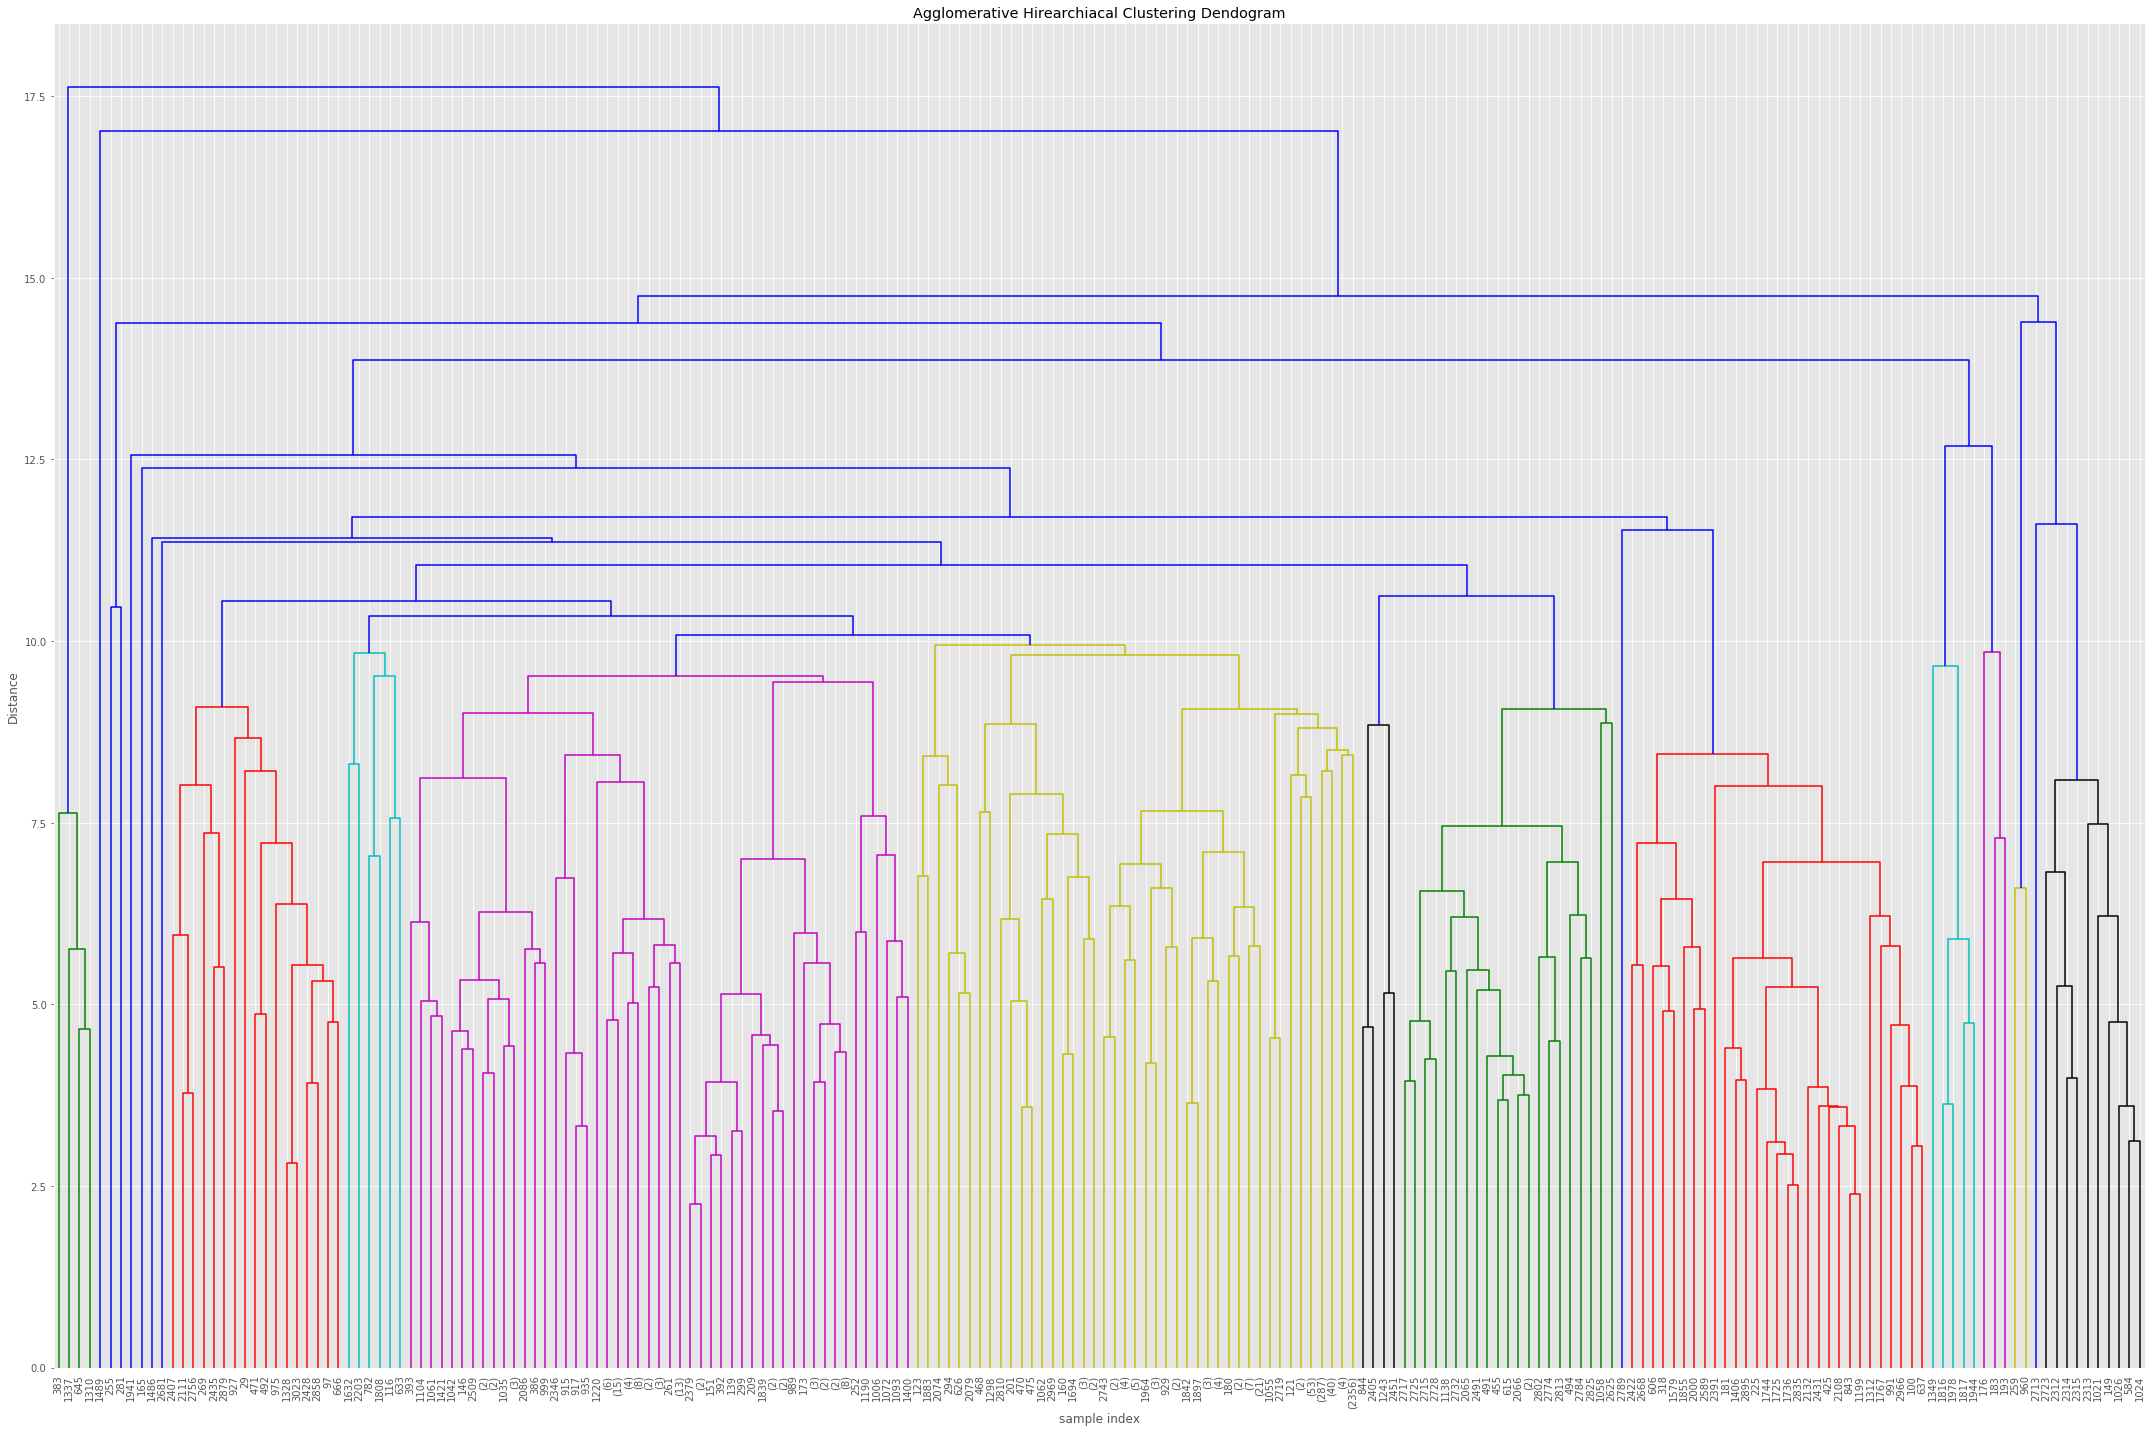

In [235]:
plot_dendogram(data_pca,distance_threshold=10,p=20,linkage_method='average')

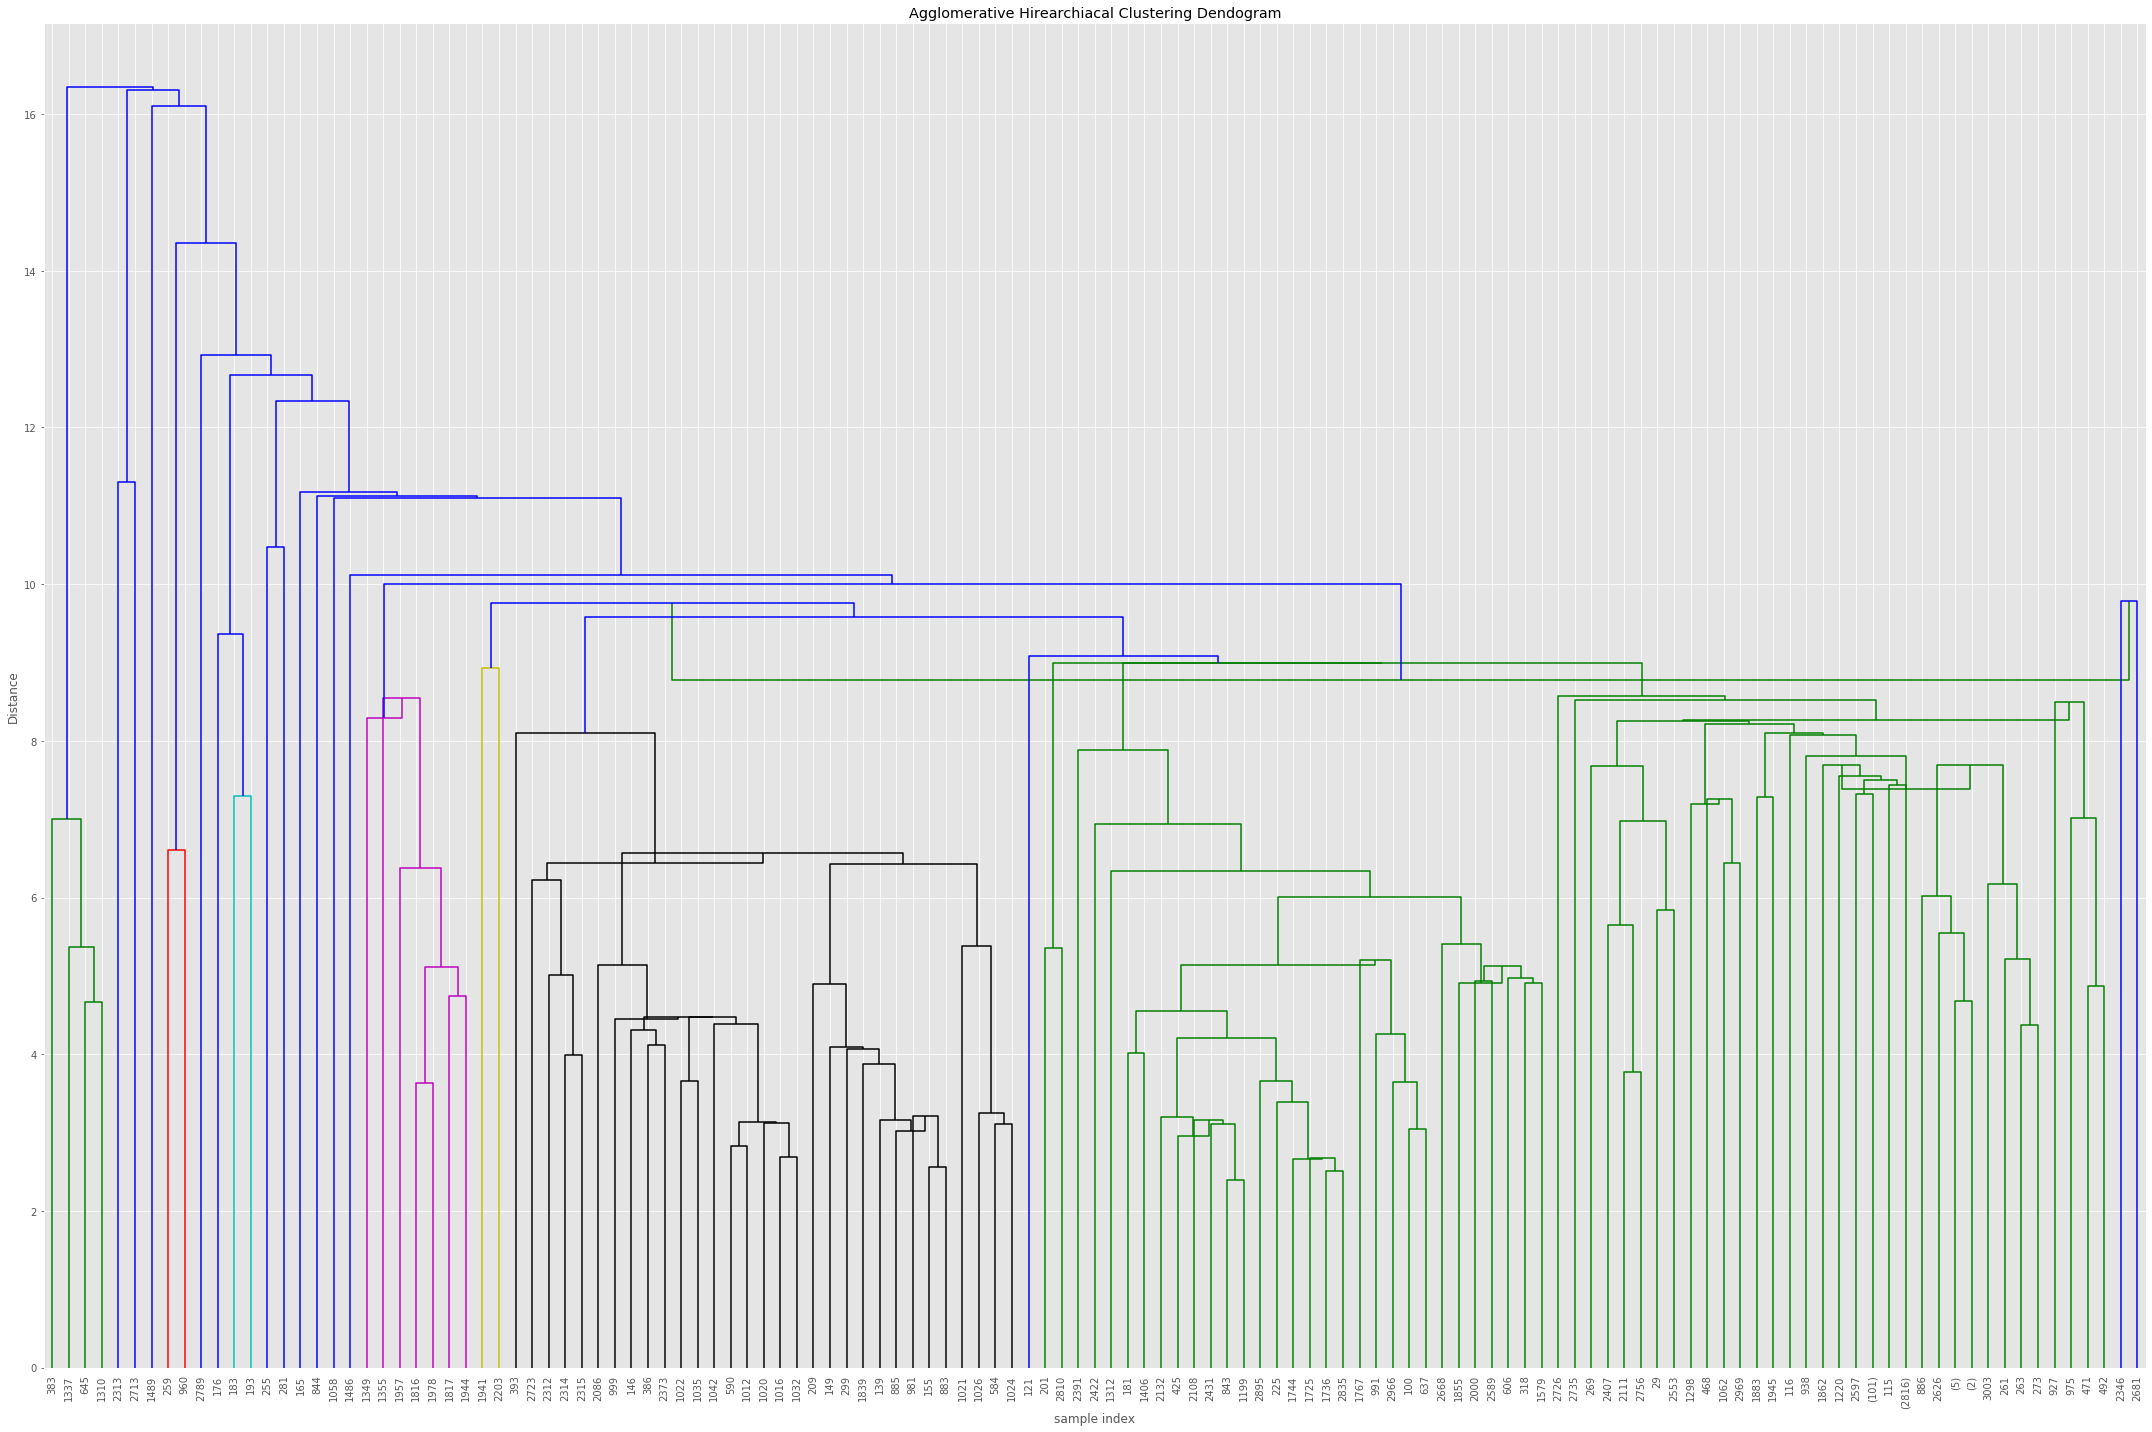

In [233]:
plot_dendogram(data_pca,distance_threshold=9,p=30)

- In one branch we find 2800 samples.So selecting only those samples and clustering

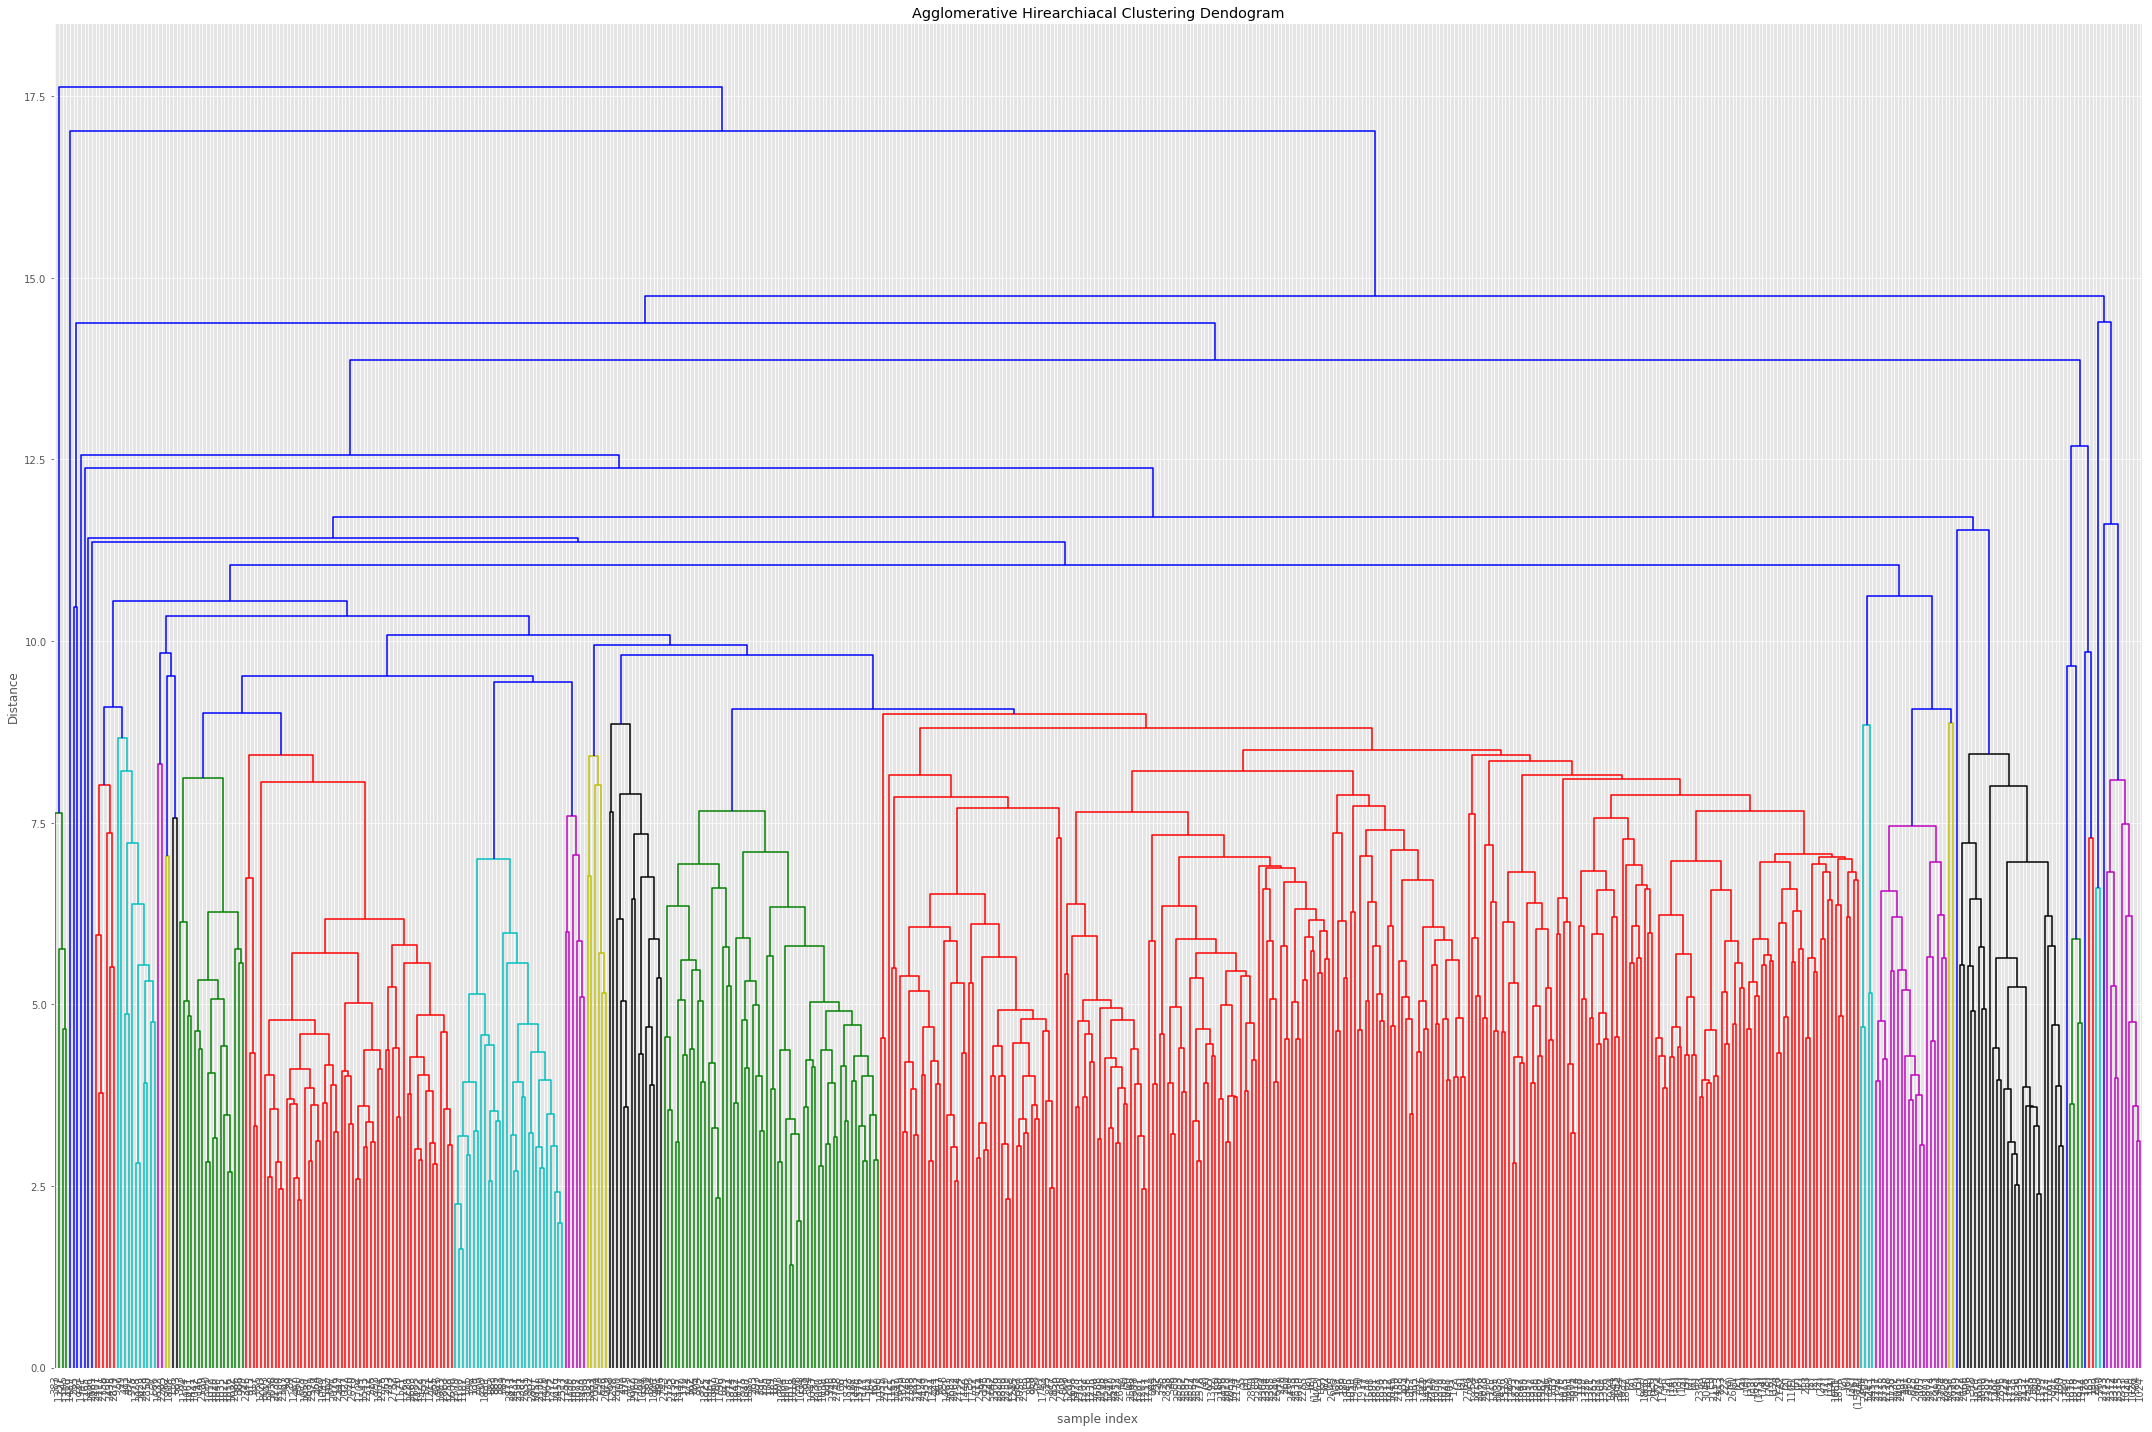

In [234]:
plot_dendogram(data_pca,distance_threshold=9,p=30,linkage_method='average')

In [236]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=9,linkage='average')

model.fit(df_pca)

AgglomerativeClustering(distance_threshold=9, linkage='average',
                        n_clusters=None)

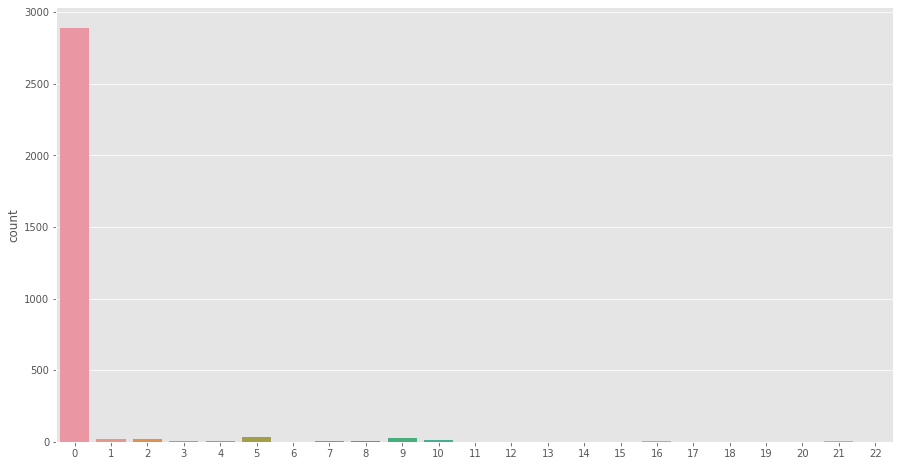

In [237]:
sns.countplot(model.labels_)

- taking data labeled as 0 only

In [240]:
data_algo = df_pca.copy(deep = True)

data_algo['label'] = model.labels_
data_algo_ = data_algo[data_algo['label'] == 0]

data_algo_.drop(columns = 'label',inplace = True)

/home/deploy/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


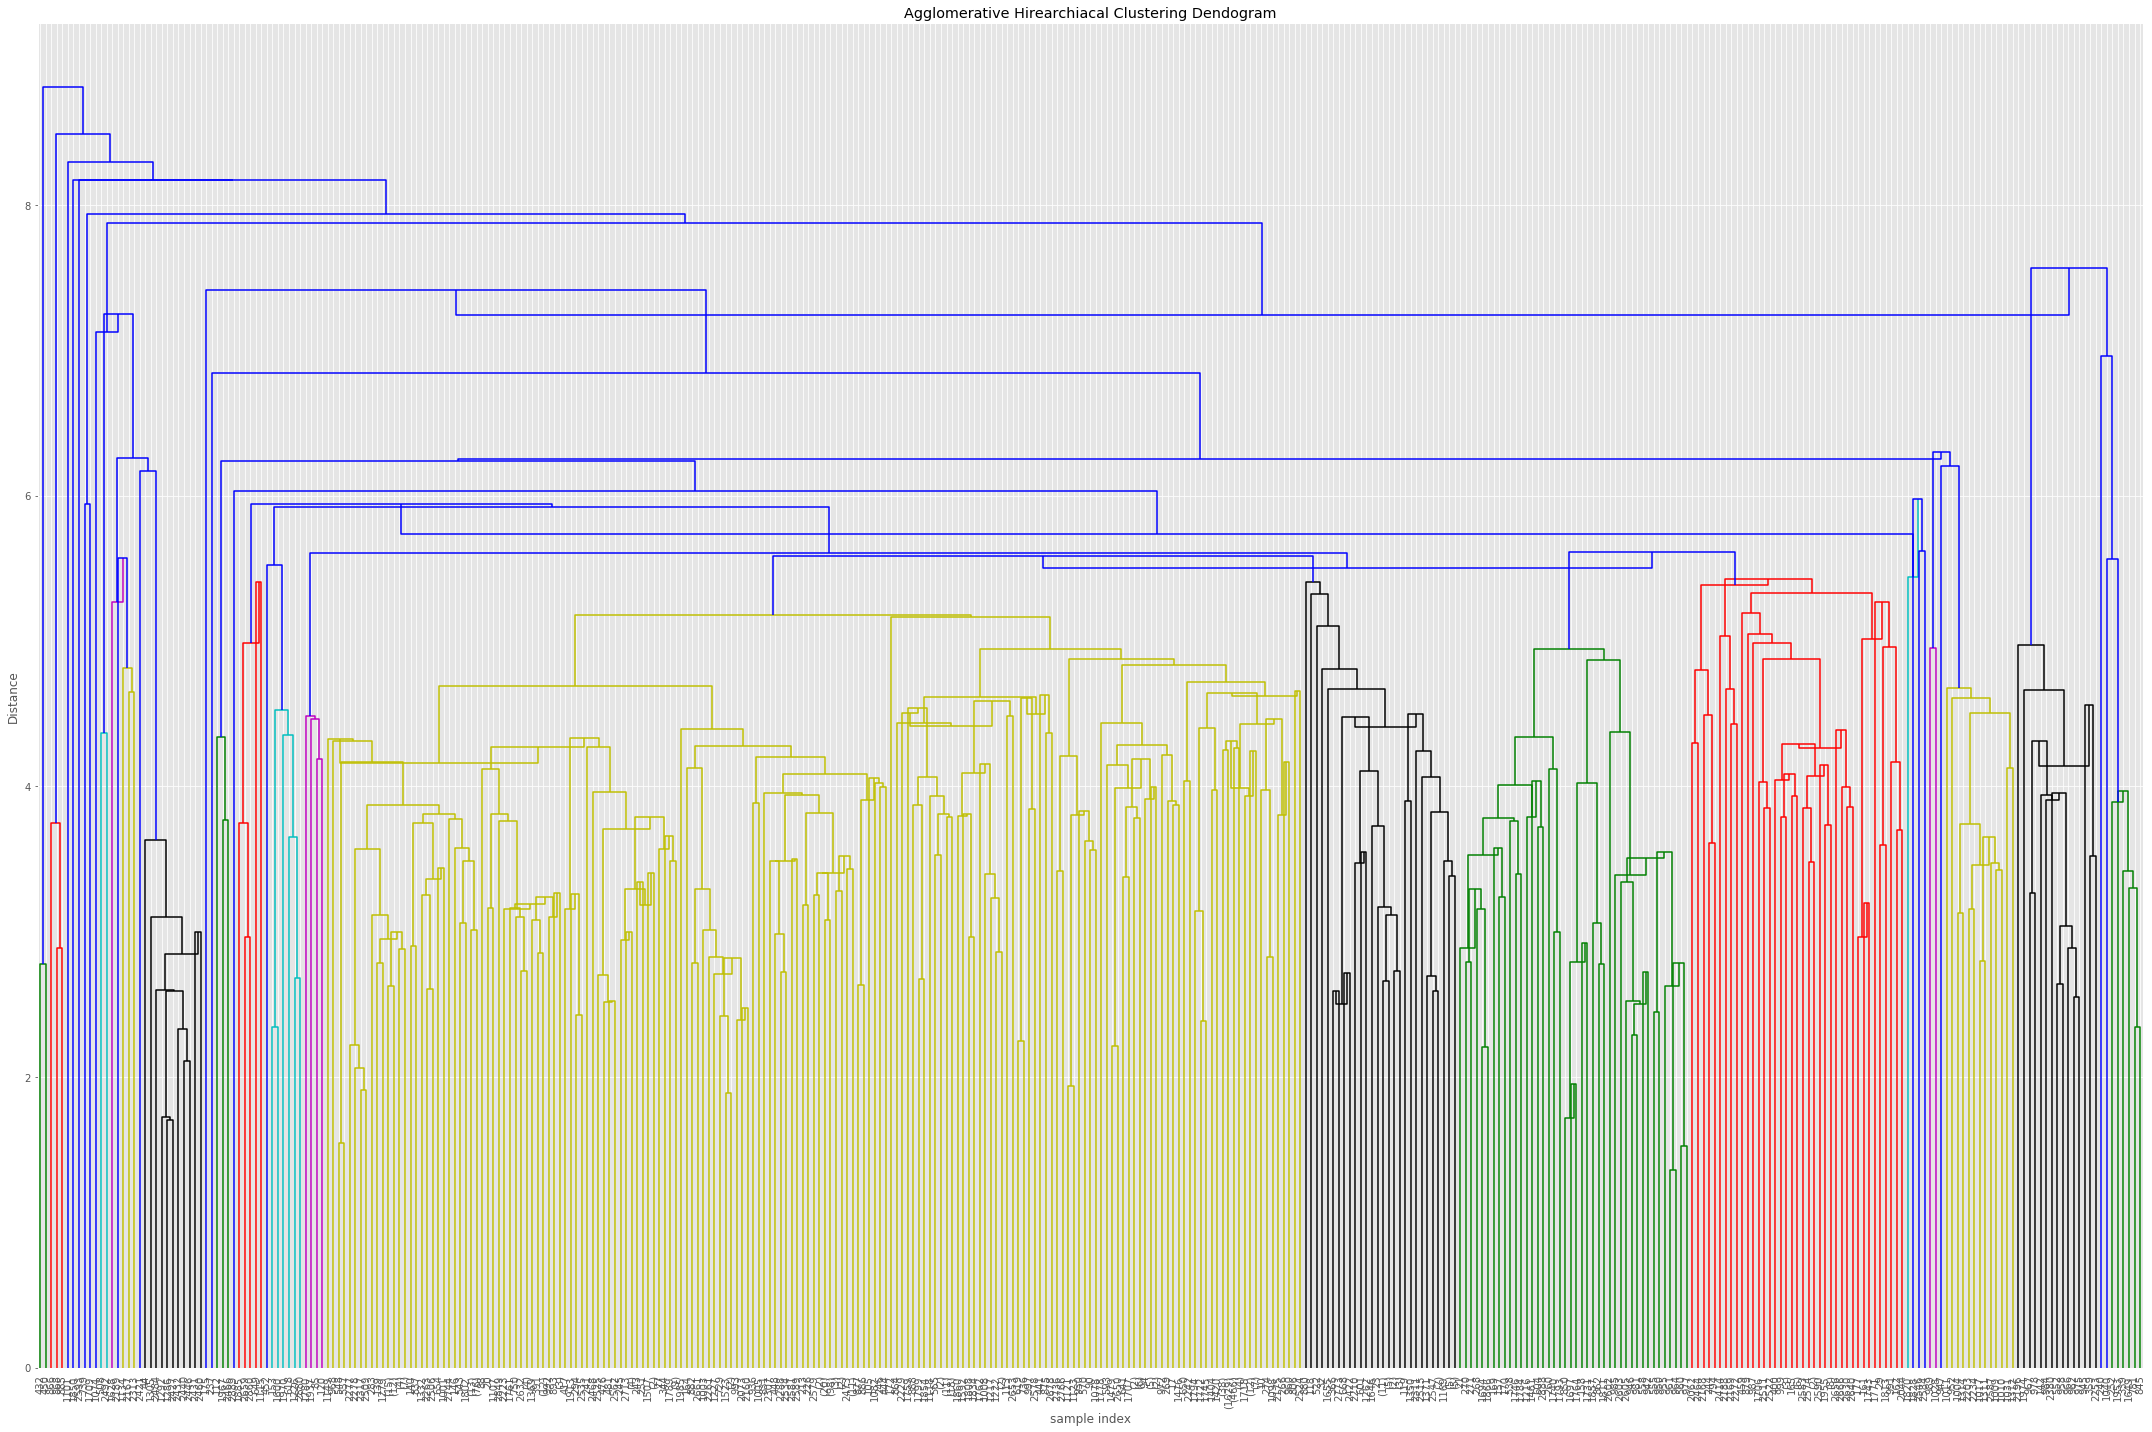

In [247]:
plot_dendogram(data_algo_,distance_threshold=5.5,p=30)

In [248]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=5.5,linkage='average')

model.fit(data_algo_)

AgglomerativeClustering(distance_threshold=5.5, linkage='average',
                        n_clusters=None)

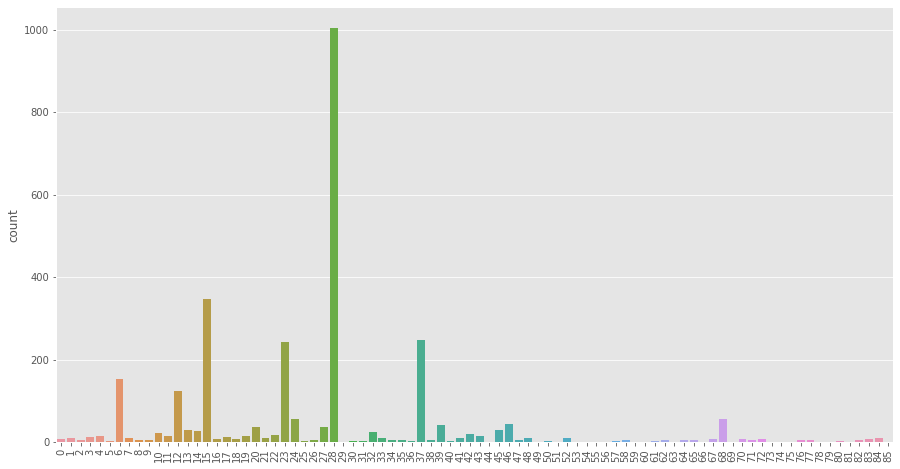

In [250]:
sns.countplot(model.labels_)
plt.xticks(rotation=90)
plt.show()

In [252]:
data_algo = data_algo_.copy(deep = True)

data_algo['label'] = model.labels_
data_algo_new = data_algo[(data_algo['label'] == 28)|(data_algo['label'] == 15)|(data_algo['label'] == 23)|(data_algo['label'] == 37)|(data_algo['label'] == 6)|(data_algo['label'] == 12)]

data_algo_new.drop(columns = 'label',inplace = True)

/home/deploy/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


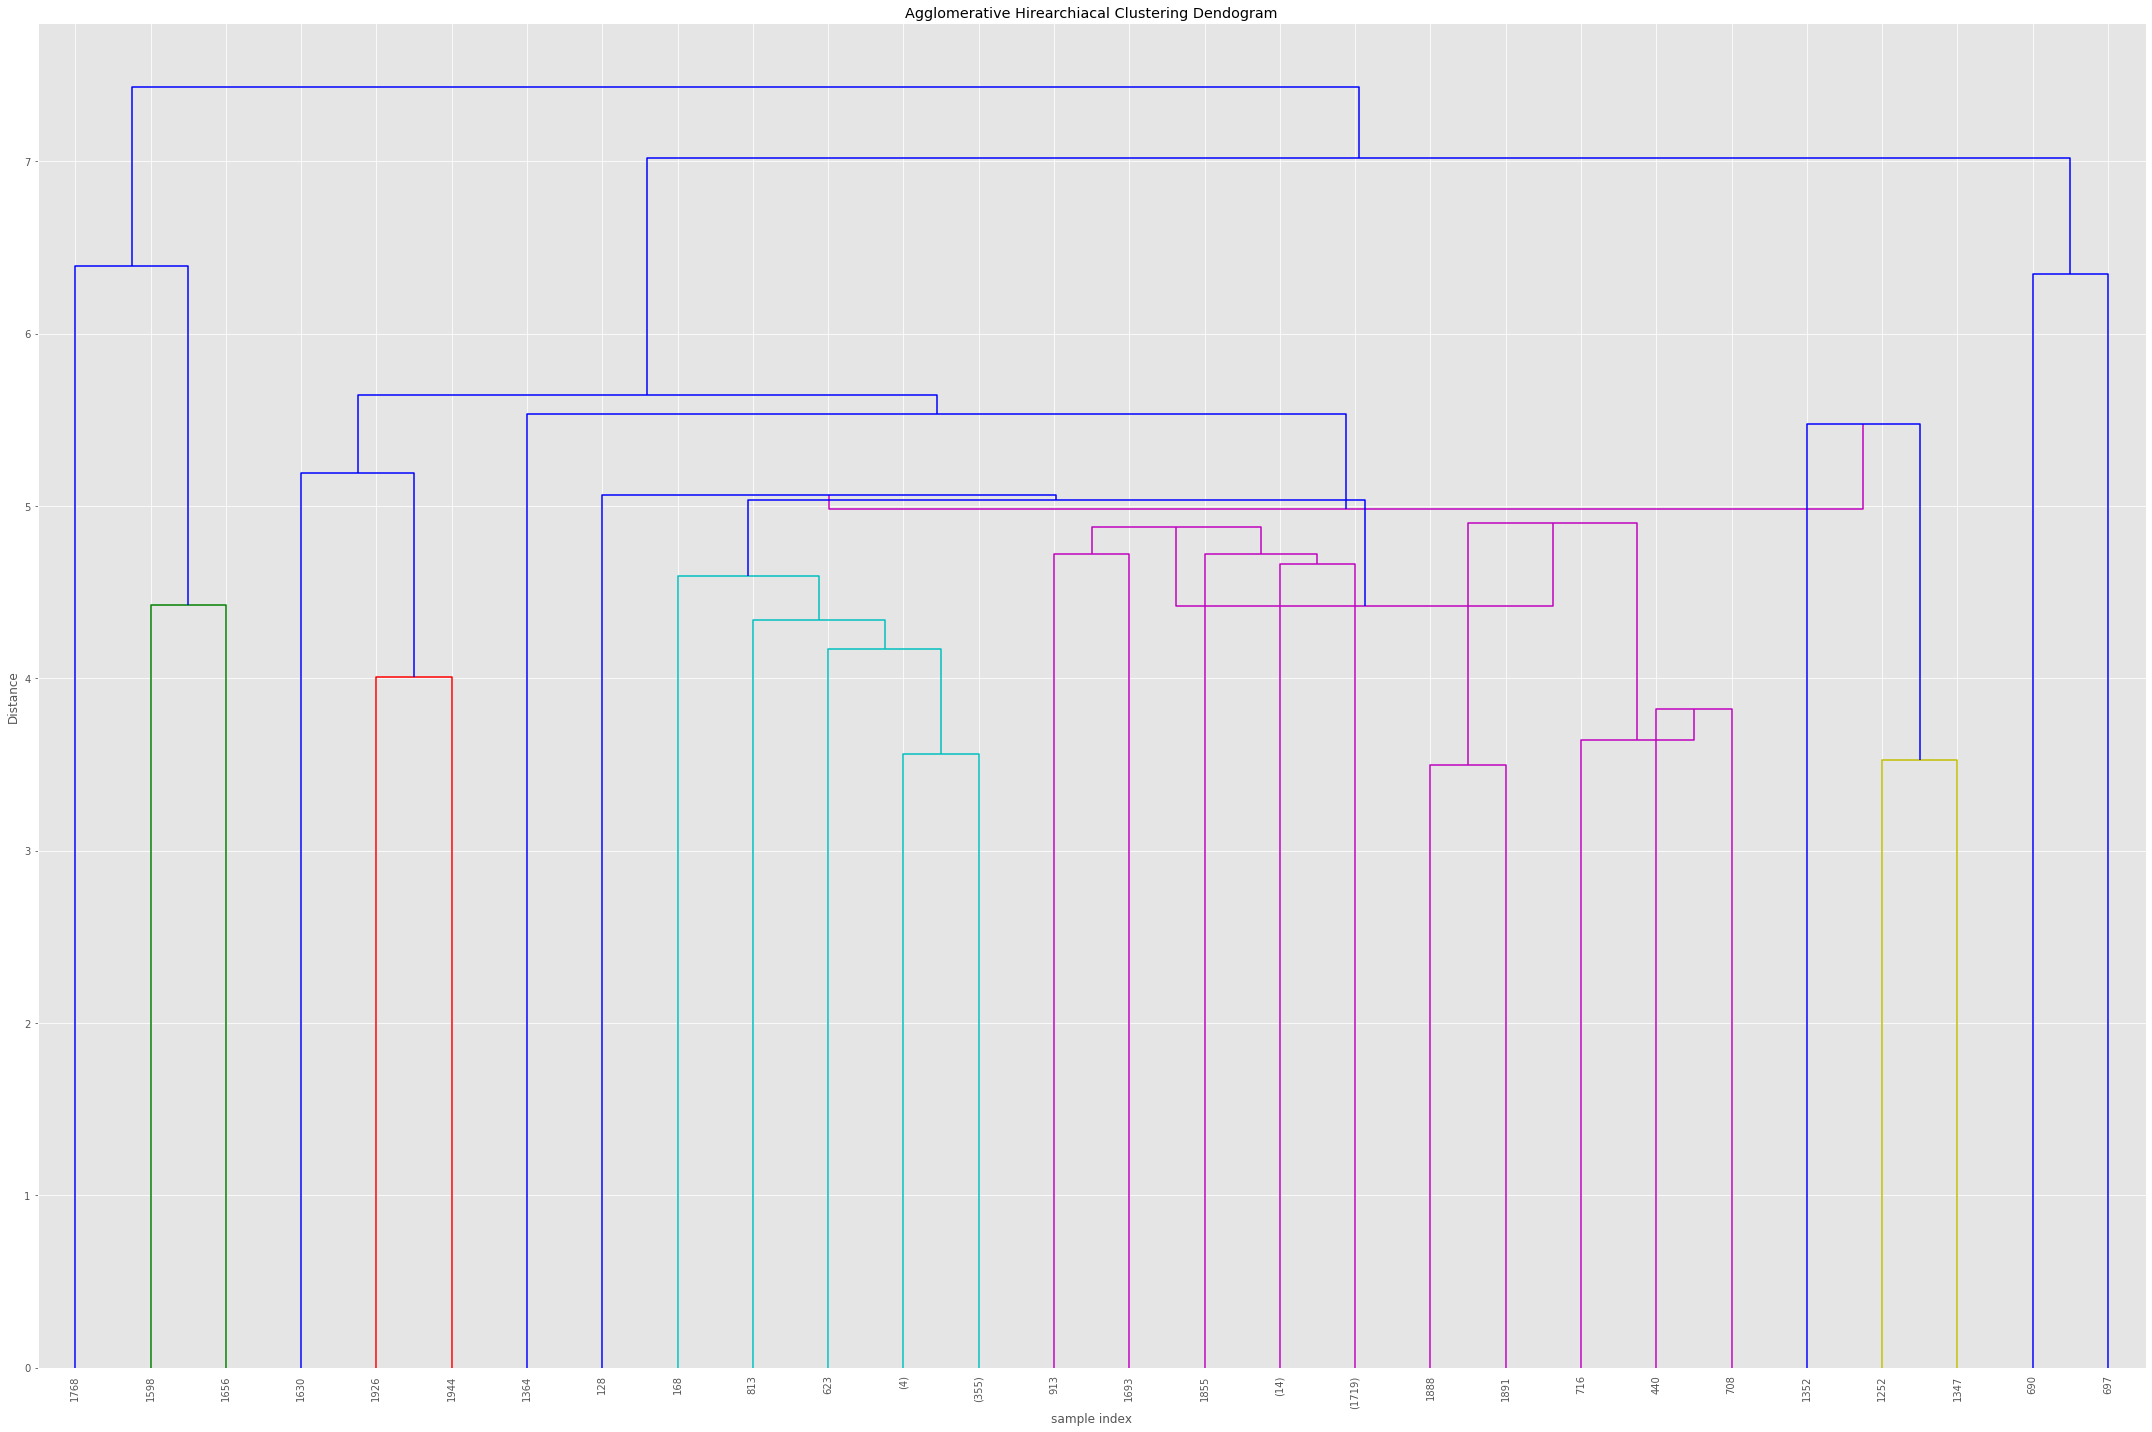

In [254]:
plot_dendogram(data_algo_new,distance_threshold=5,p=10)

In [259]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=4.5,linkage='average')

model.fit(data_algo_)

AgglomerativeClustering(distance_threshold=4.5, linkage='average',
                        n_clusters=None)

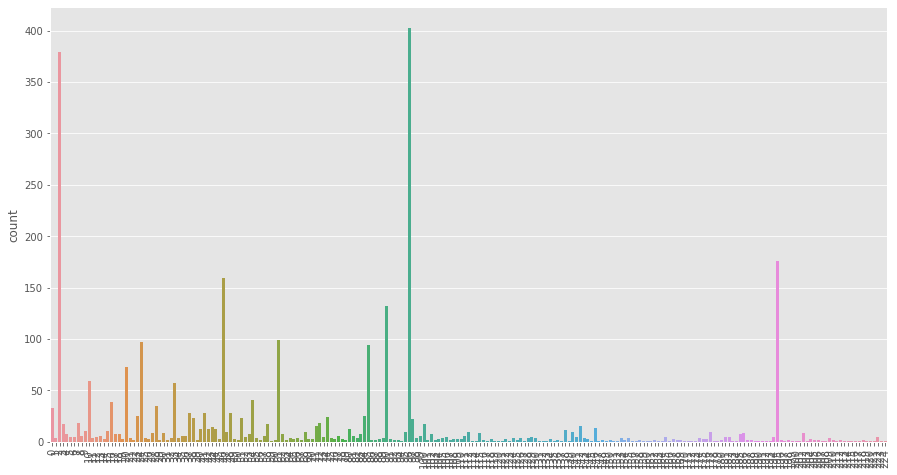

In [260]:
sns.countplot(model.labels_)
plt.xticks(rotation=90)
plt.show()

- From the above plot we can find 2 dominant clusters and remaining clusters have less size

##### interpret the clusters of KMeans with 4 clus

In [274]:
counties_labeled_as_0 = df_copy[df_copy['predicted_labels'] == 0]['Geography'].to_list()
states_labeled_as_0 = df_copy[df_copy['predicted_labels'] == 0]['state'].value_counts()

states_labeled_as_0

 Georgia           88
 Mississippi       57
 Louisiana         37
 Texas             31
 Arkansas          28
 North Carolina    28
 South Carolina    25
 Florida           22
 Alabama           22
 New Mexico        19
 Kentucky          15
 Virginia          13
 Oklahoma          10
 California         9
 South Dakota       7
 Arizona            5
 Alaska             5
 Colorado           5
 Tennessee          4
 Missouri           4
 Montana            4
 Washington         3
 Illinois           3
 North Dakota       3
 Maryland           2
 Michigan           2
 Oregon             2
 Pennsylvania       2
 Minnesota          1
 Utah               1
 New Jersey         1
 West Virginia      1
 New York           1
 Kansas             1
 Nebraska           1
 Wisconsin          1
Name: state, dtype: int64

In [205]:
counties_labeled_as_1 = df_copy[df_copy['predicted_labels'] == 1]['Geography'].to_list()
states_labeled_as_1 = df_copy[df_copy['predicted_labels'] == 1]['state'].value_counts()

states_labeled_as_1

 Kansas            79
 Iowa              76
 Nebraska          74
 Texas             65
 Minnesota         57
 Indiana           48
 North Dakota      44
 South Dakota      42
 Virginia          41
 Illinois          38
 Wisconsin         34
 Ohio              29
 Missouri          28
 Montana           25
 Oklahoma          20
 Idaho             20
 Wyoming           19
 Pennsylvania      19
 Colorado          19
 Utah              17
 Georgia           14
 Kentucky          12
 Michigan          12
 New York          11
 Alaska             7
 Vermont            6
 North Carolina     6
 Nevada             6
 Tennessee          4
 Oregon             4
 Washington         4
 New Hampshire      3
 New Mexico         3
 Alabama            3
 West Virginia      3
 Maryland           3
 Maine              3
 Florida            2
 Massachusetts      2
 Arkansas           2
 Louisiana          2
 California         2
 New Jersey         1
 Arizona            1
Name: state, dtype: int64

In [206]:
counties_labeled_as_2 = df_copy[df_copy['predicted_labels'] == 2]['Geography'].to_list()
states_labeled_as_2 = df_copy[df_copy['predicted_labels'] == 2]['state'].value_counts()

states_labeled_as_2

 Texas             104
 Kentucky           81
 Tennessee          76
 Missouri           66
 Michigan           52
 West Virginia      48
 North Carolina     46
 Arkansas           40
 Oklahoma           39
 Illinois           39
 Virginia           37
 Ohio               37
 Georgia            31
 Alabama            27
 Indiana            25
 Florida            24
 Pennsylvania       24
 Oregon             21
 New York           20
 Washington         19
 Wisconsin          18
 Colorado           18
 Mississippi        17
 Idaho              16
 Montana            15
 Louisiana          14
 California         14
 Iowa               12
 Maine              10
 South Carolina     10
 Minnesota           8
 Nevada              8
 New Mexico          7
 Arizona             6
 Maryland            6
 Kansas              6
 Vermont             6
 South Dakota        5
 Utah                1
 Delaware            1
 New Hampshire       1
 Nebraska            1
Name: state, dtype: int64

In [207]:
counties_labeled_as_3 = df_copy[df_copy['predicted_labels'] == 3]['Geography'].to_list()
states_labeled_as_3 = df_copy[df_copy['predicted_labels'] == 3]['state'].value_counts()

states_labeled_as_3

 Virginia                34
 Texas                   33
 California              32
 New York                30
 Illinois                22
 Pennsylvania            22
 Georgia                 22
 Minnesota               21
 Ohio                    21
 North Carolina          19
 New Jersey              19
 Wisconsin               19
 Indiana                 19
 Florida                 18
 Colorado                18
 Missouri                17
 Michigan                17
 Kansas                  16
 Washington              13
 Maryland                13
 Kentucky                12
 Massachusetts           12
 Iowa                    11
 Tennessee               11
 Louisiana               11
 Alabama                 11
 South Carolina          11
 Oregon                   9
 Oklahoma                 8
 Utah                     8
 Connecticut              8
 Mississippi              8
 Idaho                    6
 New Hampshire            6
 Alaska                   6
 Rhode Island       

In [211]:
df_copy.groupby('predicted_labels')['state'].value_counts()

predicted_labels  state                
0                  Georgia                 88
                   Mississippi             57
                   Louisiana               37
                   Texas                   31
                   Arkansas                28
                   North Carolina          28
                   South Carolina          25
                   Alabama                 22
                   Florida                 22
                   New Mexico              19
                   Kentucky                15
                   Virginia                13
                   Oklahoma                10
                   California               9
                   South Dakota             7
                   Alaska                   5
                   Arizona                  5
                   Colorado                 5
                   Missouri                 4
                   Montana                  4
                   Tennessee            

### Can we differentiate regions based on clusters

- cluster 0 is belongs to **south-east states** such as Georgia,Mississippi,Louisiana majorly
- cluster 1 belongs to **central states** such as Kansas,Iowa,Nebraska majorly
- cluster 2 belongs to **southern states** such as Texas, Tennessee,Kentucky majorly
- cluster 3 doesn't actually belong to any region, it has combination all regions

#### which model is better

- Kmeans with clusters 3 and 4 are not biased to any one cluster only. (from count plots)
- Kmeans with cluster 4 having better centroid-centres than Kmeans 3 cluster.(from centroid plots)
- WE have reduced the about 50% of dimensions because of using PCA (from 33 features to 16 features)


In [265]:
df_copy['predicted_labels'].value_counts()

2    1056
1     910
3     618
0     463
Name: predicted_labels, dtype: int64

avgAnnCount



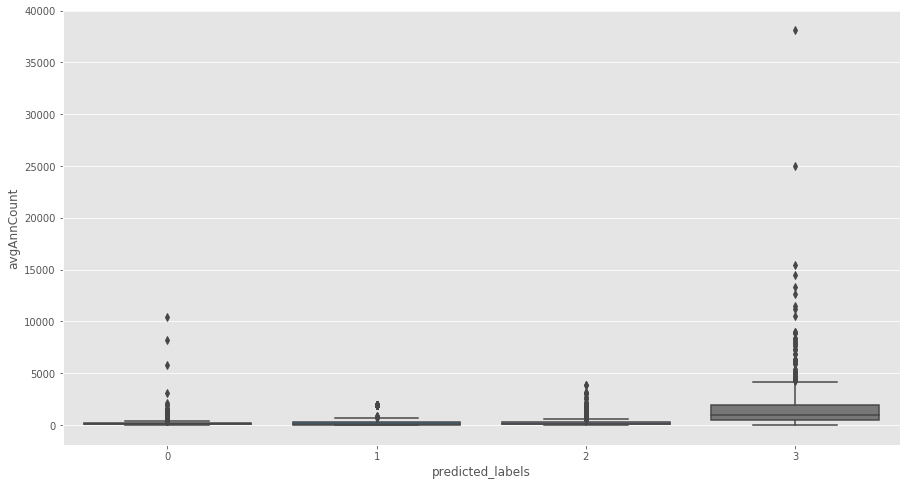


----------------------------------------------------------------------------------------------------
avgDeathsPerYear



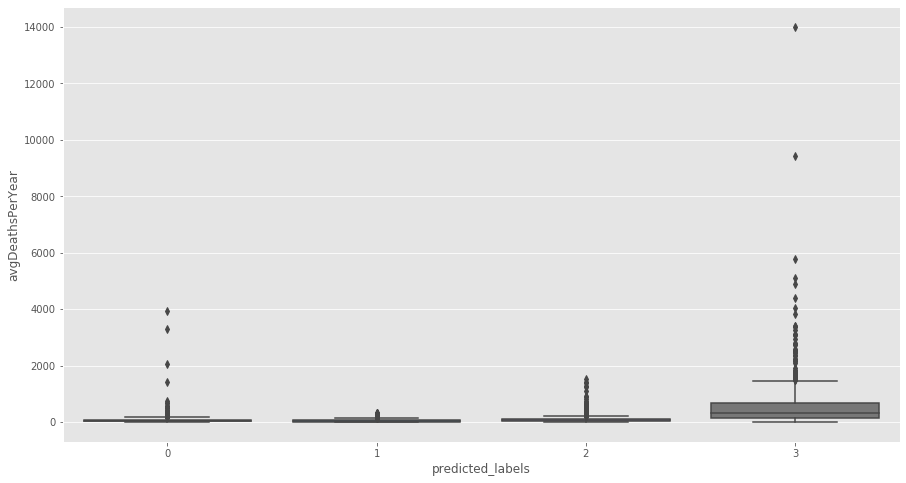


----------------------------------------------------------------------------------------------------
TARGET_deathRate



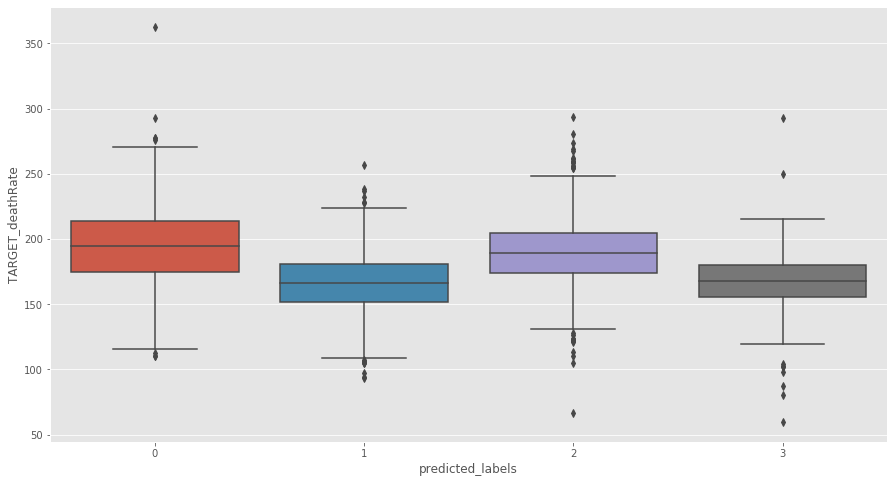


----------------------------------------------------------------------------------------------------
incidenceRate



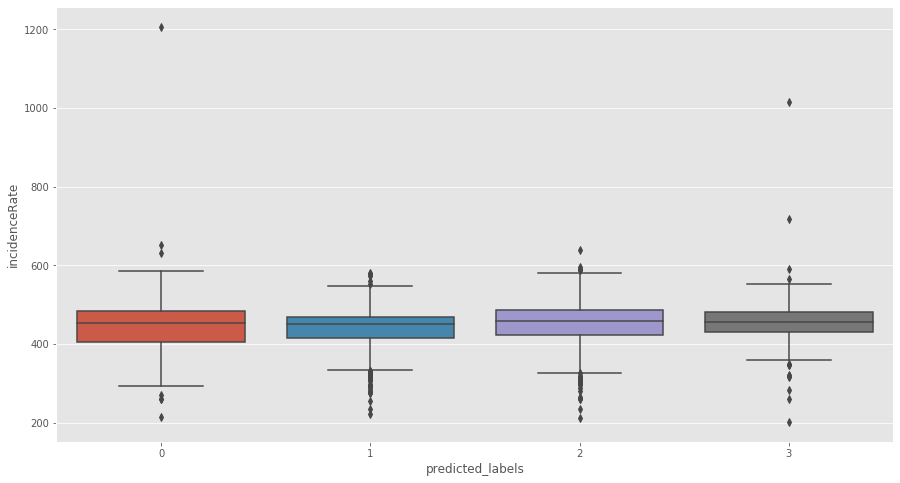


----------------------------------------------------------------------------------------------------
medIncome



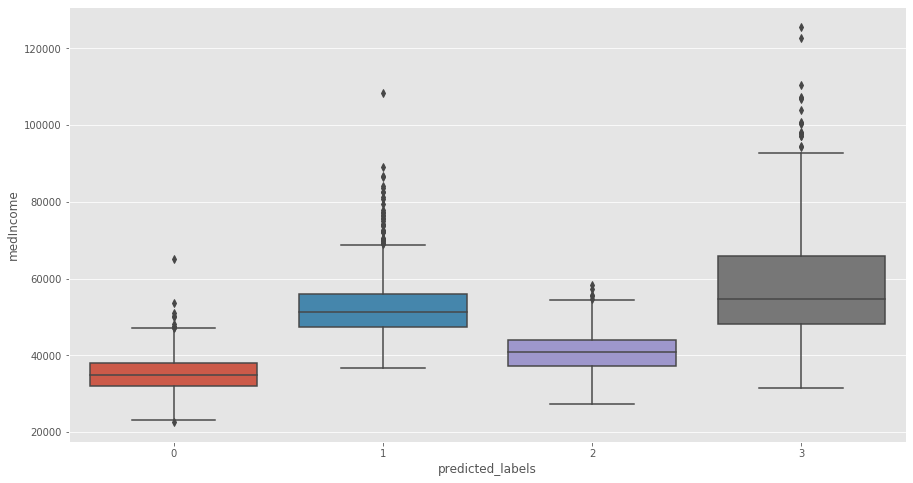


----------------------------------------------------------------------------------------------------
popEst2015



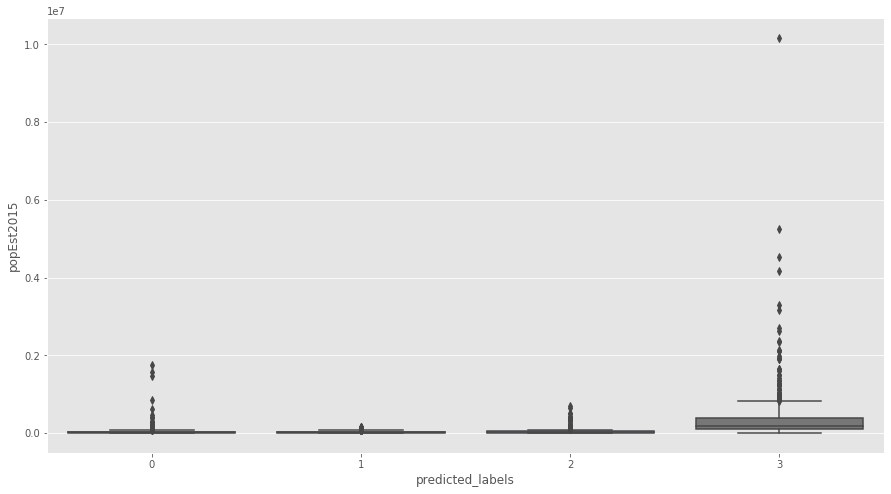


----------------------------------------------------------------------------------------------------
povertyPercent



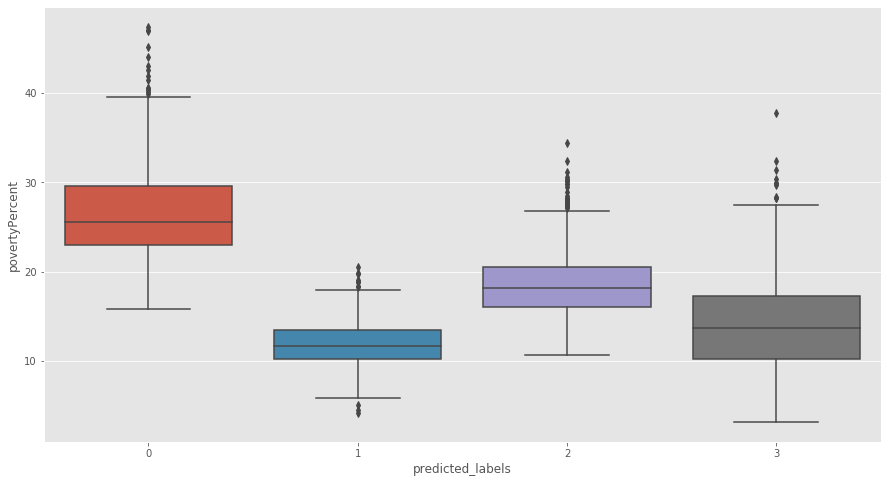


----------------------------------------------------------------------------------------------------
studyPerCap



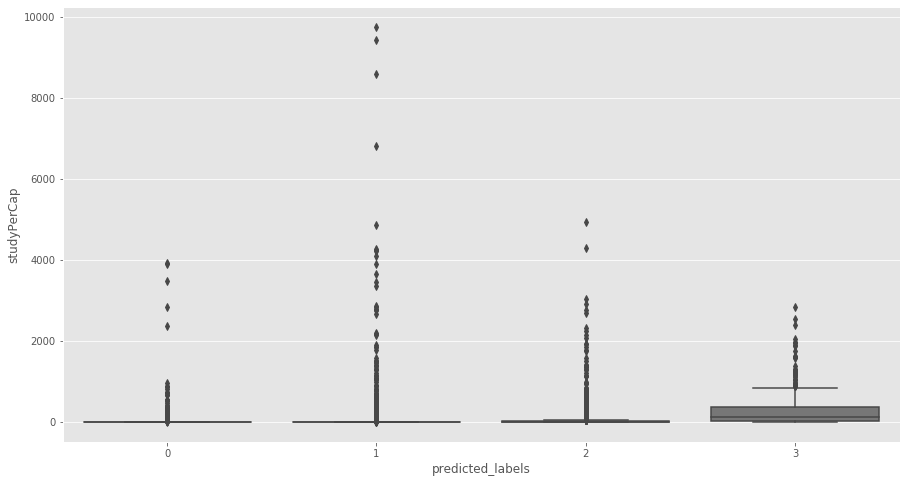


----------------------------------------------------------------------------------------------------
MedianAge



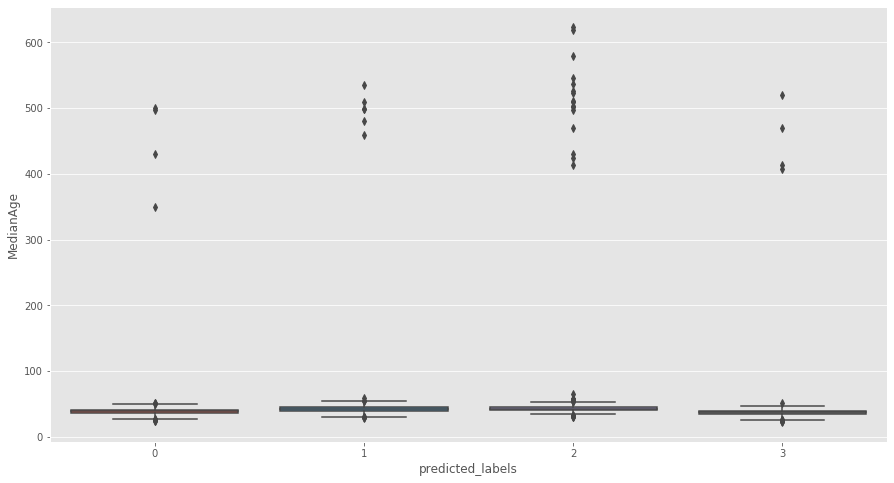


----------------------------------------------------------------------------------------------------
MedianAgeMale



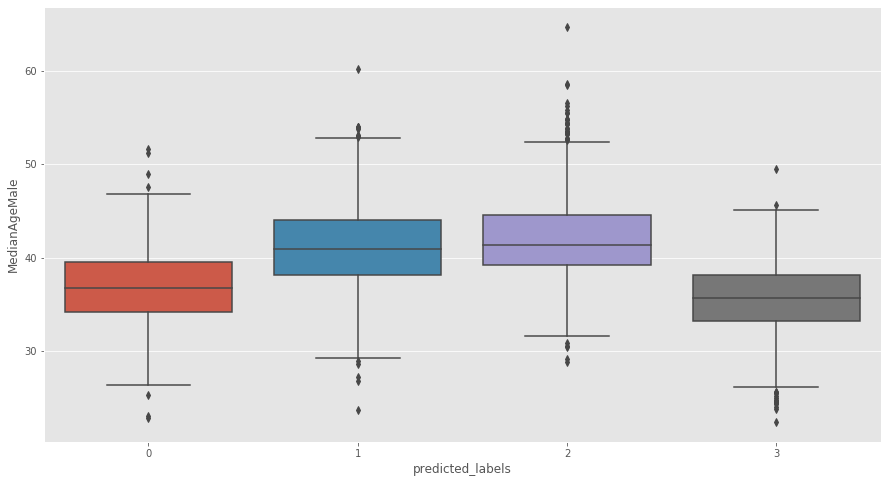


----------------------------------------------------------------------------------------------------
MedianAgeFemale



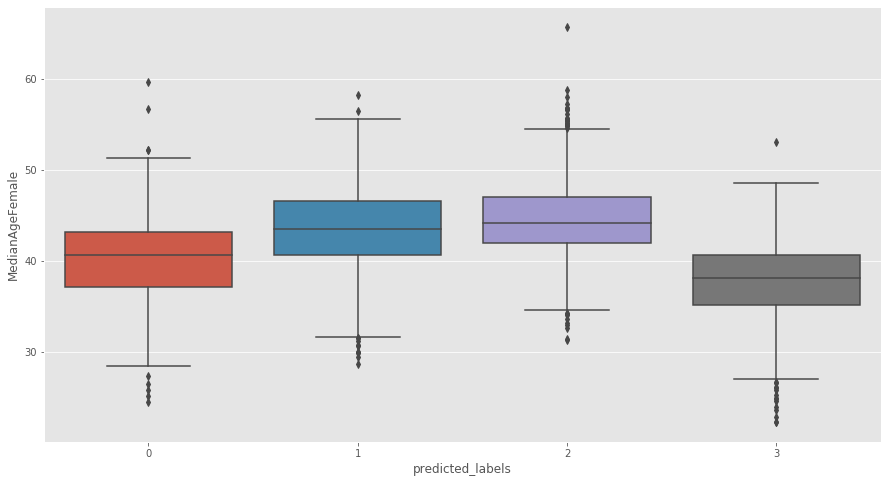


----------------------------------------------------------------------------------------------------
AvgHouseholdSize



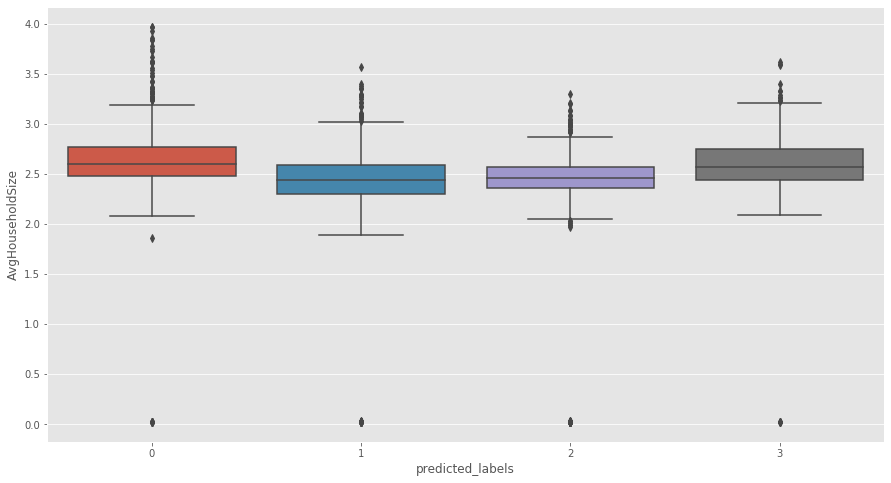


----------------------------------------------------------------------------------------------------
PercentMarried



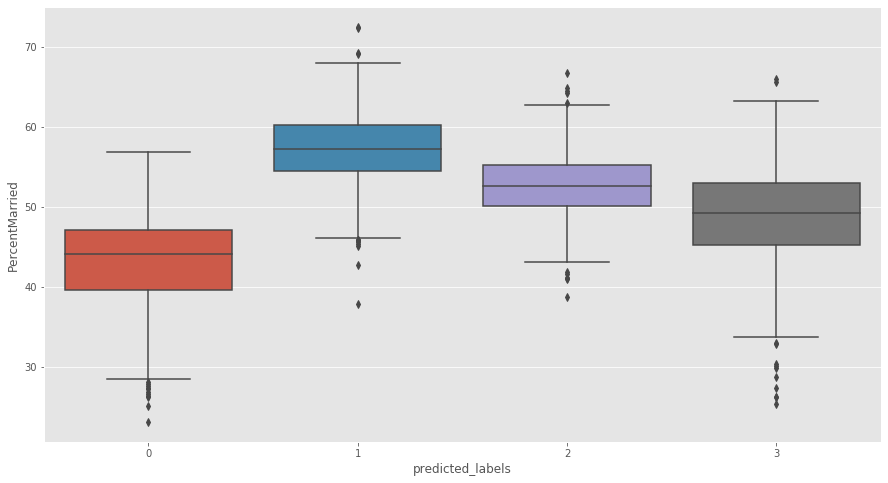


----------------------------------------------------------------------------------------------------
PctNoHS18_24



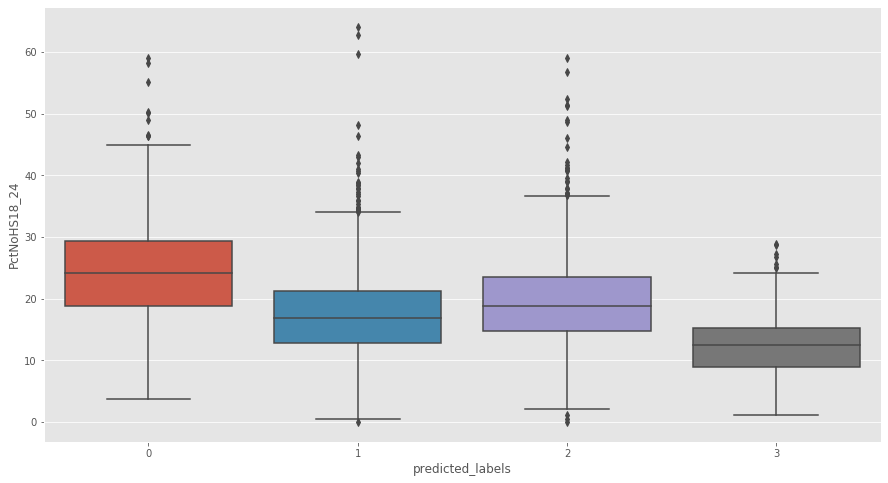


----------------------------------------------------------------------------------------------------
PctHS18_24



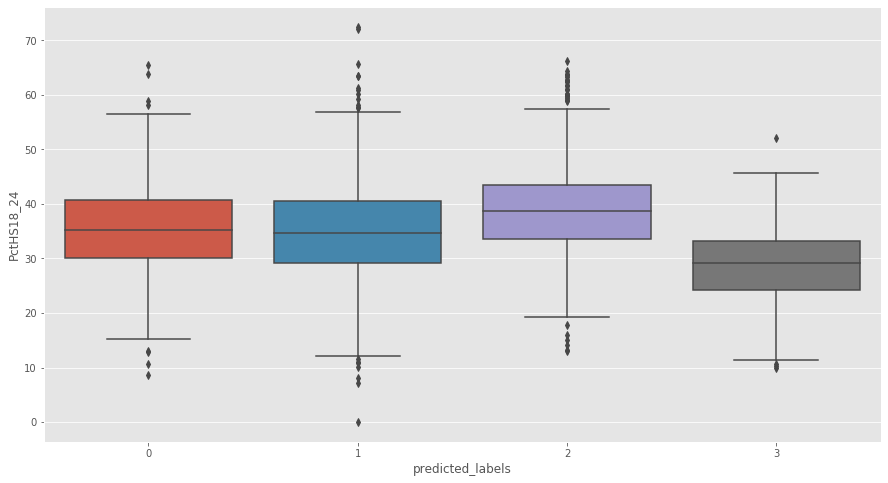


----------------------------------------------------------------------------------------------------
PctSomeCol18_24



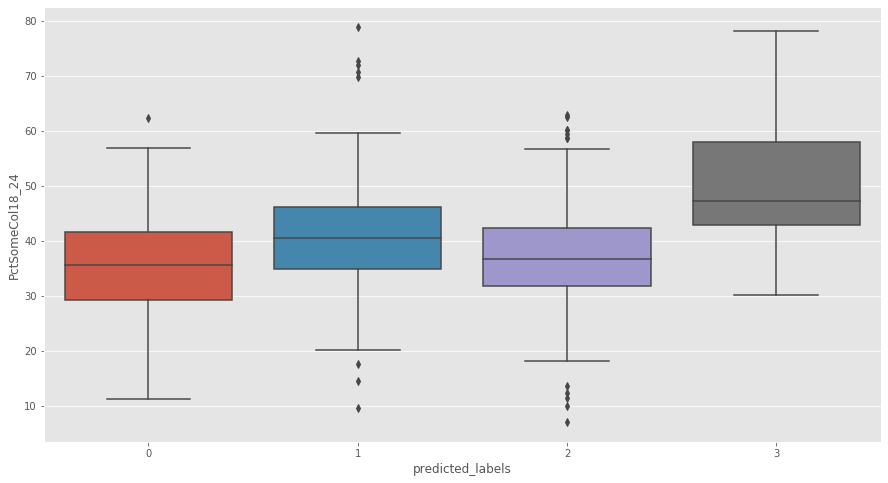


----------------------------------------------------------------------------------------------------
PctBachDeg18_24



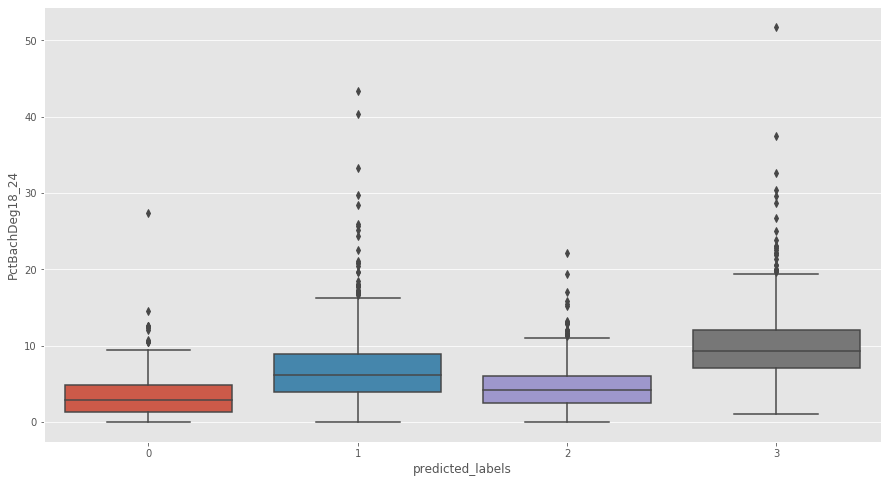


----------------------------------------------------------------------------------------------------
PctHS25_Over



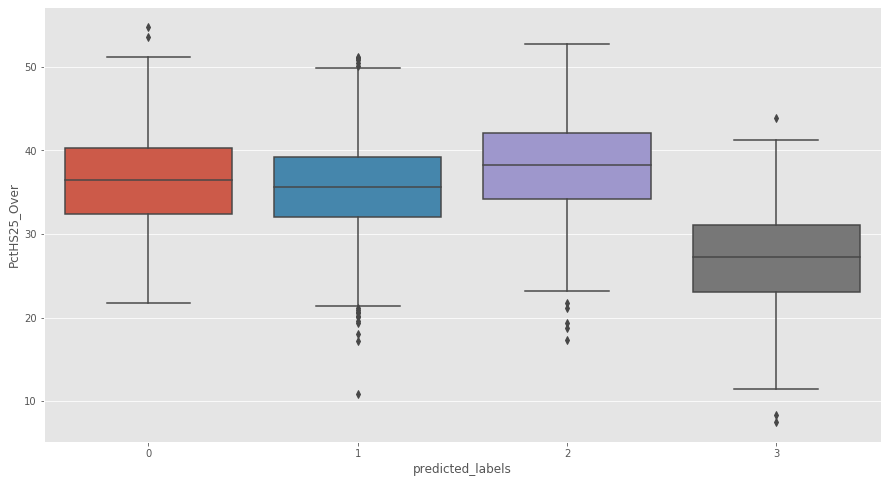


----------------------------------------------------------------------------------------------------
PctBachDeg25_Over



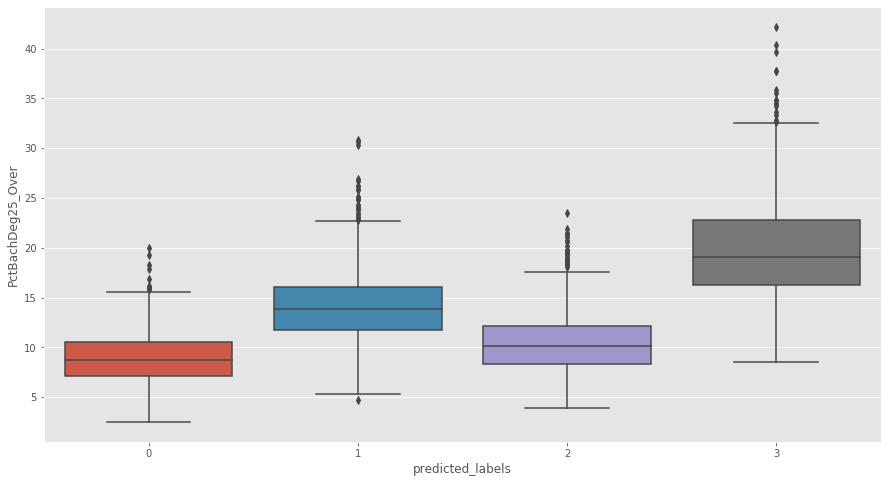


----------------------------------------------------------------------------------------------------
PctEmployed16_Over



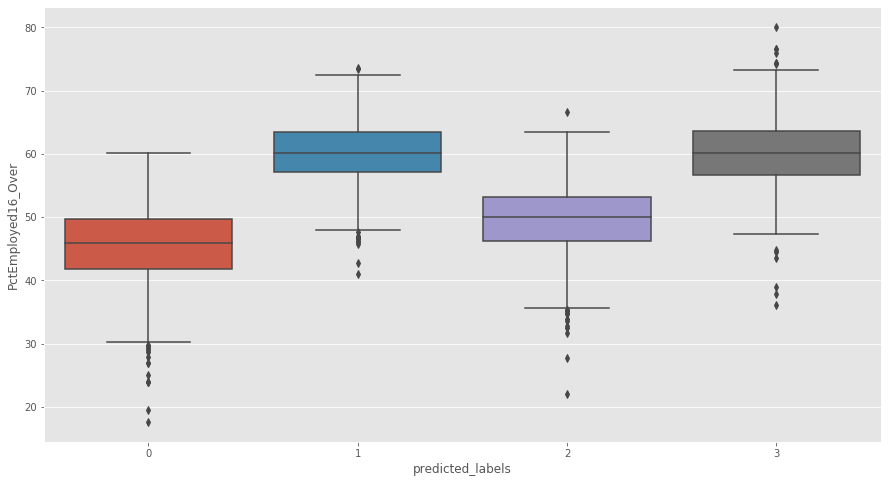


----------------------------------------------------------------------------------------------------
PctUnemployed16_Over



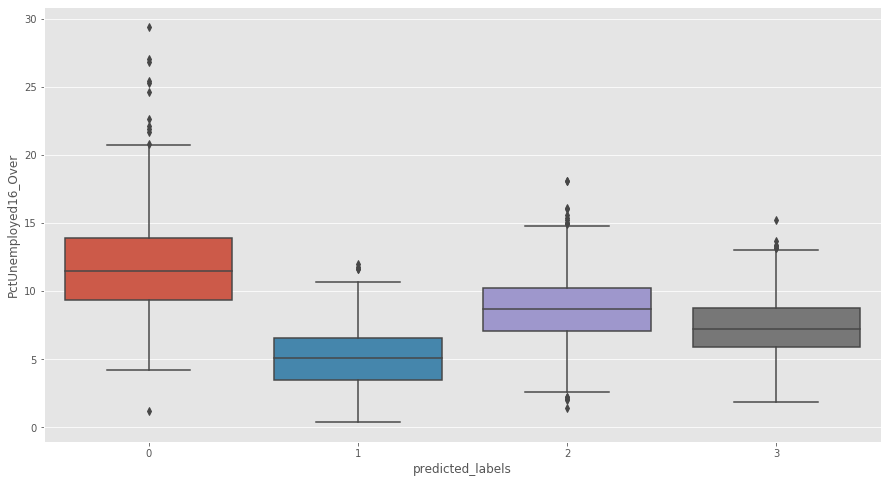


----------------------------------------------------------------------------------------------------
PctPrivateCoverage



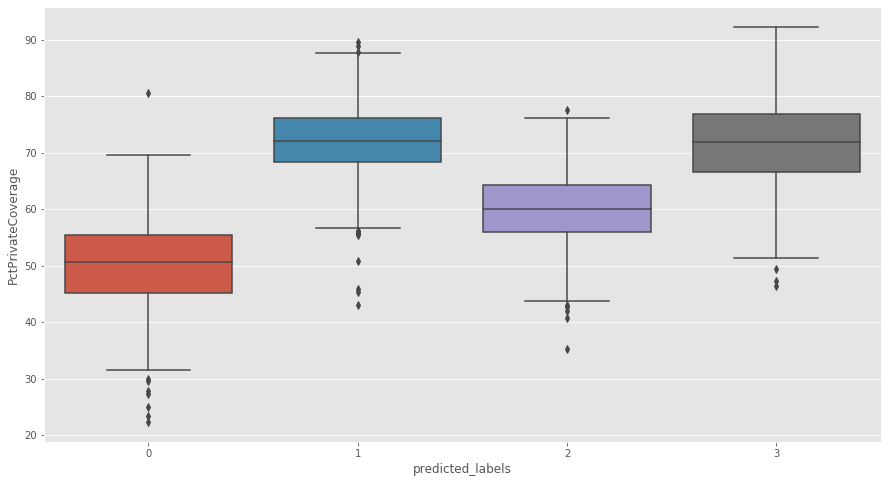


----------------------------------------------------------------------------------------------------
PctPrivateCoverageAlone



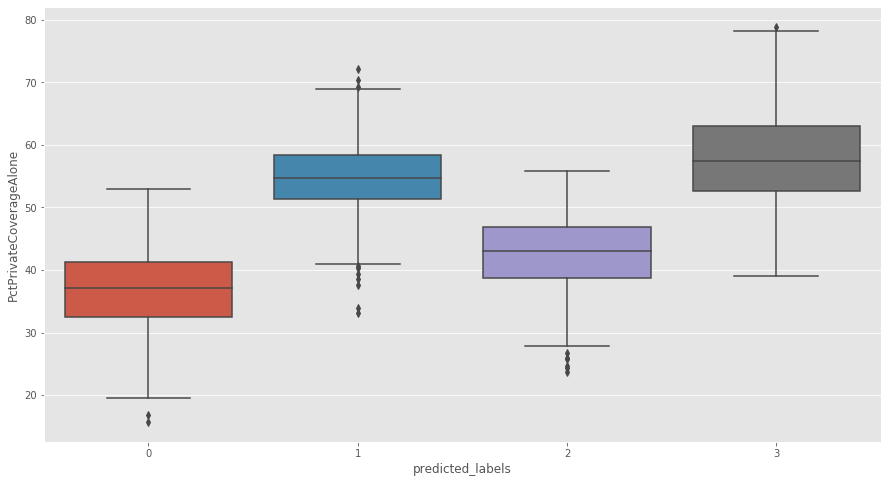


----------------------------------------------------------------------------------------------------
PctEmpPrivCoverage



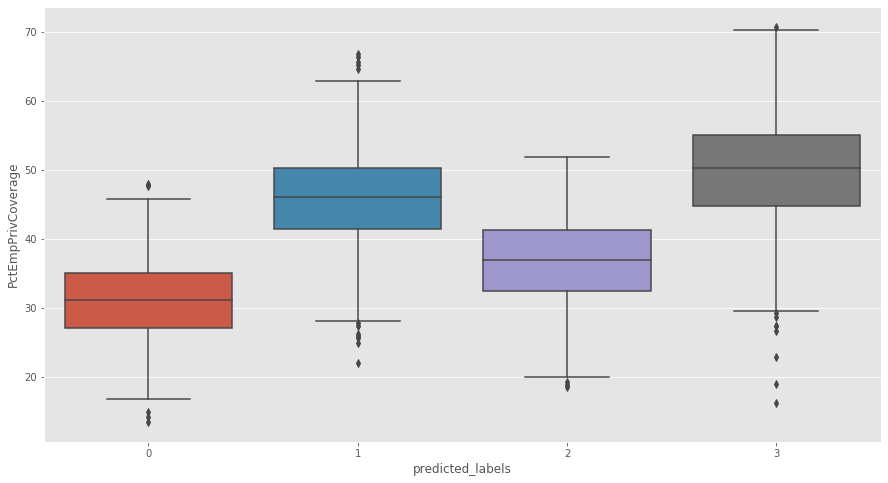


----------------------------------------------------------------------------------------------------
PctPublicCoverage



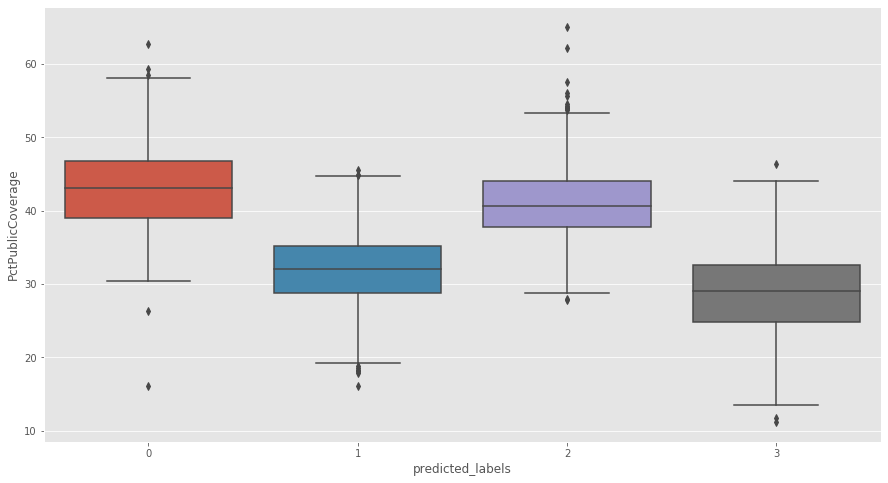


----------------------------------------------------------------------------------------------------
PctPublicCoverageAlone



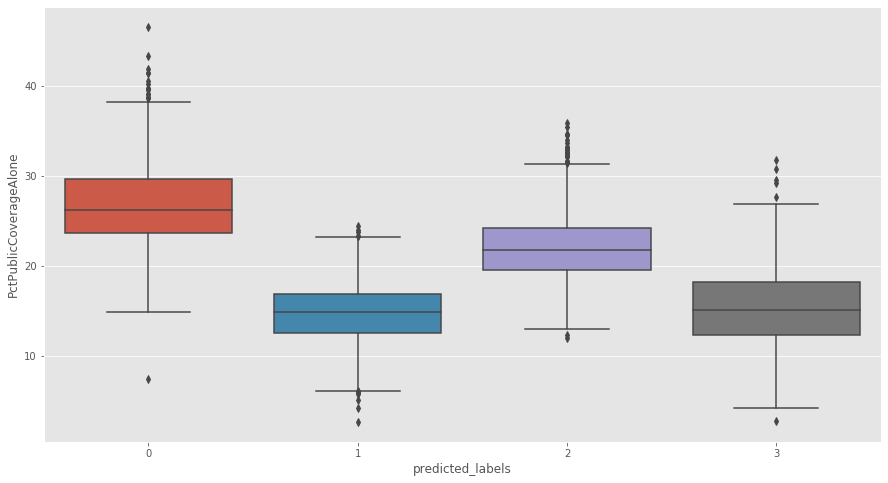


----------------------------------------------------------------------------------------------------
PctWhite



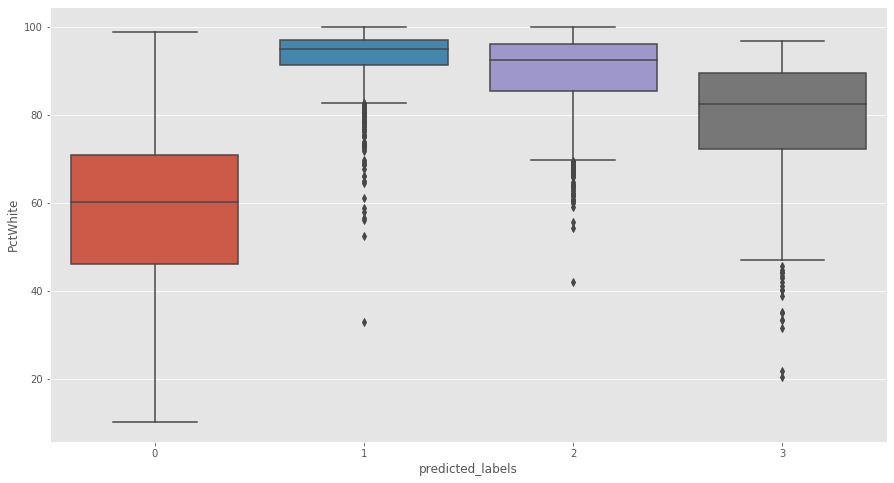


----------------------------------------------------------------------------------------------------
PctBlack



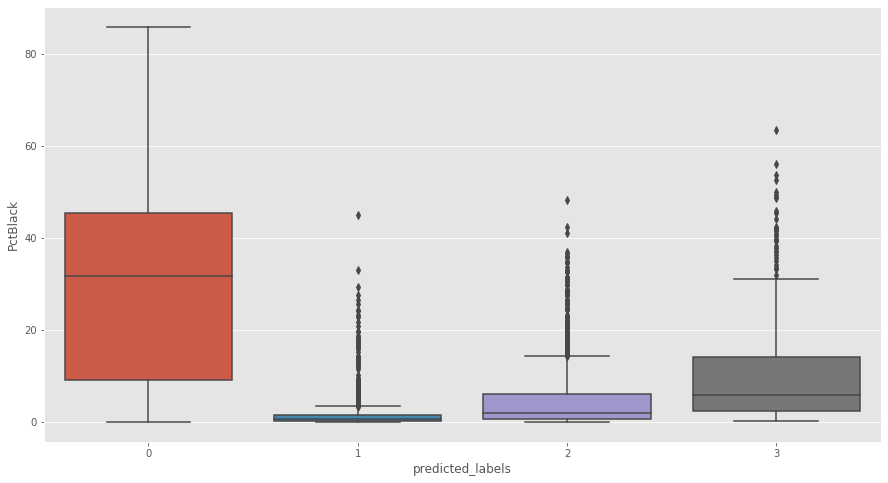


----------------------------------------------------------------------------------------------------
PctAsian



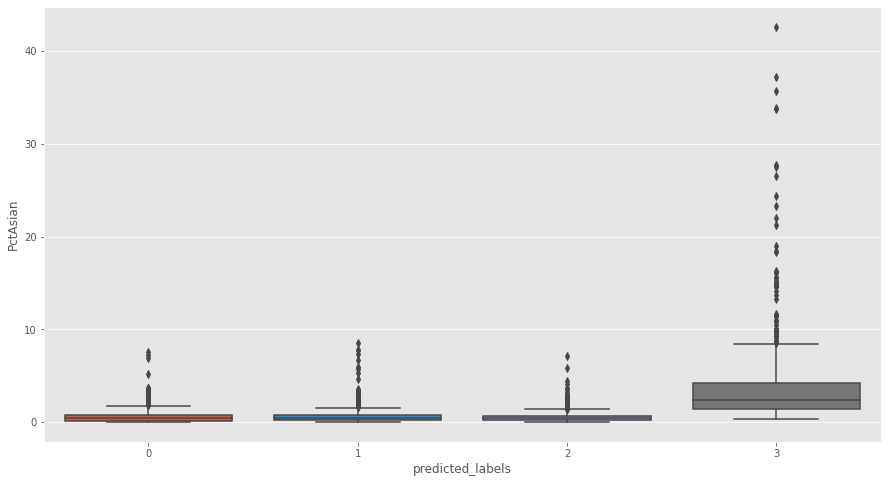


----------------------------------------------------------------------------------------------------
PctOtherRace



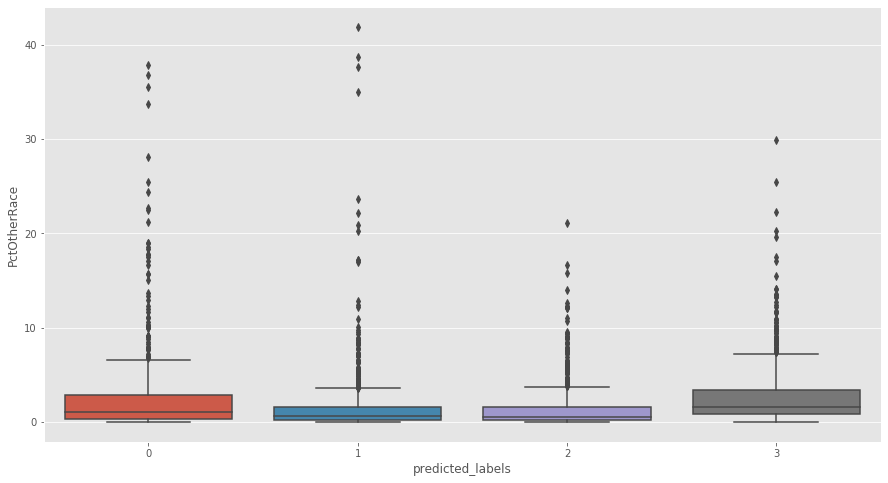


----------------------------------------------------------------------------------------------------
PctMarriedHouseholds



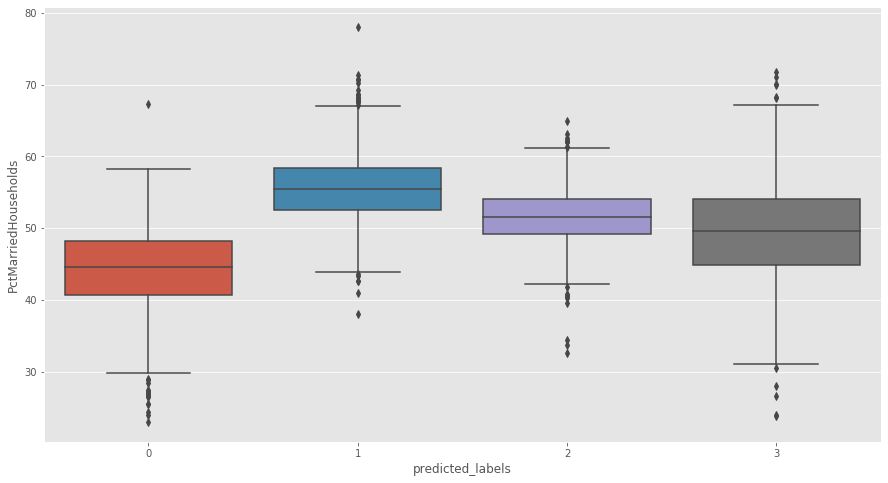


----------------------------------------------------------------------------------------------------
BirthRate



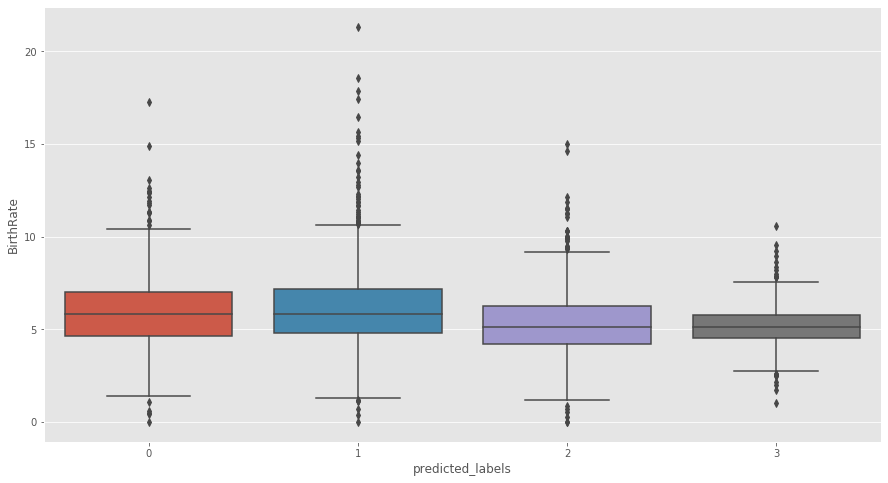


----------------------------------------------------------------------------------------------------
predicted_labels



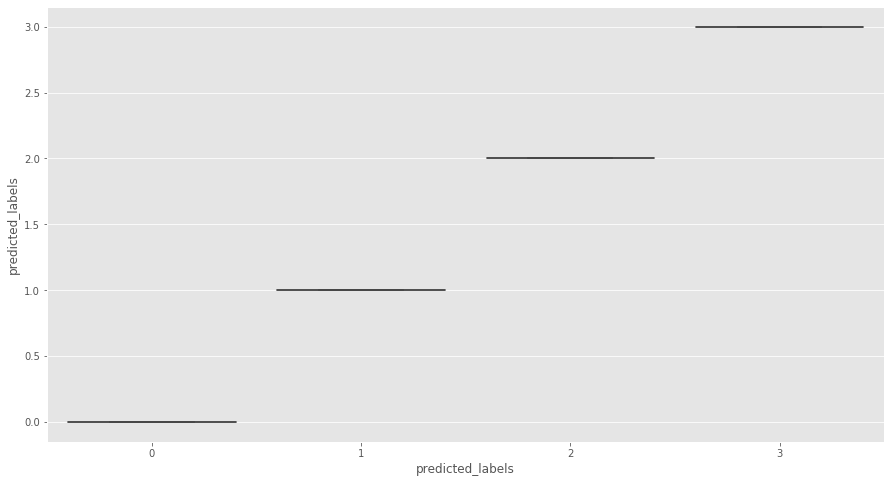


----------------------------------------------------------------------------------------------------


In [272]:
for col in df_copy.select_dtypes(exclude = 'object').columns:
    print(col)
    print()
    
    sns.boxplot(data = df_copy ,y = col, x = 'predicted_labels')
    plt.show()
    print()
    print('--'*50)

### The above plots are plotted based on Orginal_data(Untreated data)

- The Median DeathRate is different for each cluster. **Cluster_0 has highest Median DeathRate**
- The Incidence rate in all clusters are similar
- The Median MedIncome is different for each cluster. **Cluster_3 has highest Median Income group and cluster_0 has lowest**
- **cluster_0 has Highest Poverty Percent and cluster_1 lowest**
- Cluster_0 has Adults(30-40) more in number
- **cluster_0 less Percent married than others**
- **cluster_0 has less employent over 16** and **highest unemployement**
- **cluster_0 has highest median percent public coverage**
- **cluster_0 has lowest median percent private coverage**
- **cluster_0 has most of the Black people**


In [279]:
print('states where special care has to be taken') 
states_labeled_as_0.index

states where special care has to be taken


Index([' Georgia', ' Mississippi', ' Louisiana', ' Texas', ' Arkansas',
       ' North Carolina', ' South Carolina', ' Florida', ' Alabama',
       ' New Mexico', ' Kentucky', ' Virginia', ' Oklahoma', ' California',
       ' South Dakota', ' Arizona', ' Alaska', ' Colorado', ' Tennessee',
       ' Missouri', ' Montana', ' Washington', ' Illinois', ' North Dakota',
       ' Maryland', ' Michigan', ' Oregon', ' Pennsylvania', ' Minnesota',
       ' Utah', ' New Jersey', ' West Virginia', ' New York', ' Kansas',
       ' Nebraska', ' Wisconsin'],
      dtype='object')

In [282]:
print('counties where special care should be taken')
print()
counties_labeled_as_0

counties where special care should be taken



['Yakima County, Washington',
 'McDowell County, West Virginia',
 'Thurston County, Nebraska',
 'Cumberland County, New Jersey',
 'Chaves County, New Mexico',
 'Cibola County, New Mexico',
 'Curry County, New Mexico',
 'De Baca County, New Mexico',
 'Doña Ana County, New Mexico',
 'Guadalupe County, New Mexico',
 'Hidalgo County, New Mexico',
 'Luna County, New Mexico',
 'McKinley County, New Mexico',
 'Mora County, New Mexico',
 'Otero County, New Mexico',
 'Rio Arriba County, New Mexico',
 'Roosevelt County, New Mexico',
 'San Juan County, New Mexico',
 'San Miguel County, New Mexico',
 'Socorro County, New Mexico',
 'Taos County, New Mexico',
 'Torrance County, New Mexico',
 'Valencia County, New Mexico',
 'Bronx County, New York',
 'Lunenburg County, Virginia',
 'Northampton County, Virginia',
 'Nottoway County, Virginia',
 'Prince Edward County, Virginia',
 'Sussex County, Virginia',
 'Danville city, Virginia',
 'Franklin city, Virginia',
 'Hopewell city, Virginia',
 'Petersburg c